#**Estratégia de Cupons como Alavanca de Crescimento no iFood**

##Introdução
Este relatório apresenta a análise de viabilidade financeira de uma campanha de cupons testada via experimento A/B no iFood, além de recomendações para otimizar a iniciativa. Essa análise tem como objetivo demonstrar o impacto financeiro da campanha, o tempo necessário para atingir lucro e propor melhorias para maximizar o retorno sobre o investimento (ROI). A análise considera métodos estaísticos para avaliar se as mudanças foram ao acaso ou estatísticamente relevantes, além de apresentar cenários com e sem outliers (dados cujo os valores não representam o comportamento médio) para garantir robustez.

##Premissas

Para fins da analise irei assumir que o cupom foi no valor de R\$10,00.

Metodologia: Uso de Pyspark e métodos estatísticos como Teste U (Mann-whitney), Teste Z de proporção e Shapiro-Wilk.

Cenários: Análise com e sem outliers.

**Outliers**

Valores extremos que fogem do comportamento médio, como usuários com gastos ou pedidos muito acima da média. Avaliar ambos os cenários é crucial porque eles podem distorcer a análise, mas também refletem usuários reais de alto valor. Removê-los completamente pode subestimar o impacto da campanha e segmentos importantes enquanto mantê-los sem análise separada pode superestimar resultados gerais, comprometendo a representatividade.


###**1.	Avaliação do Teste A/B**

####**A)	Indicadores Relevantes e Impacto Significativo**

**Indicadores:**

- Receita por usuário: Média com outliers (Target `R$151,90` reais, Controle `R$134,33`), média sem outliers (Target `95,00`, Controle `86,00`).

- Taxa de retenção: Target 57,62%, Controle 47,63%, Lift de 20,98%.

- Quantidade de pedidos por usuário: Com outliers (Target 3,17, Controle 2,80), sem outliers (Target 2,11, Controle 1,90).

- Ticket médio por usuário: Com outliers (Target `R$47,83`, Controle `R$48,00`), sem outliers (Target `R$42,48`, Controle `R$42,23`).

- Volume de itens por pedido: Com outliers (Target 7,44, Controle 6,50), sem outliers (Target 4,20, Controle 3,80).

- Latência entre pedidos: Sem diferença signifcativa entre os grupos

**Impacto:**

- Receita incremental: 13,07% com outliers, 10,47% sem outliers

- Retenção aumentou significativamente (lift de 20,98% validado estatísticamente).

- Aumento em pedidos e volume de itens, com ticket médio estável.

####**B)	Viabilidade Financeira**

**Resultados:**

- Receita incremental: Com outliers: `R$17,57` (Target 151,90  – Controle 134,33 ), sem outliers: `R$9,00` (Target 95,00 – Controle 86,00).

- Margem Incremental: Com outliers: `R$3,51` (20% de 17,57), sem outliers: `R$1,80`(20% de 9,00).

- Prejuízo Inicial: Com outliers: `R$6,49` (3,51 – 10,00), sem outliers: `R$8,20` (1,80 – 10,00).

- Retenção Futura: Cosiderando o lift de retenção de 20,98%, podemos projetar que 21% dos usuários do grupo Target continuem comprando. Com um ticket médio futuro baseado no Controle (`R$134,33` com outliers, `R$126,00` sem outliers), aplicamos a margem bruta de 20% resultando em `R$26,87` por pedido (20% de `R$134,33`). Cada usuário retido pode gerar `R$80,61` em 3 pedidos futuros (`R$26,87 x 3`). Ponderando pelo Lift (`R$80,61` x 21% = `R$16,93`), o lucro líquido por usuário é de `R$10,44` (com outliers: `R$16,93` – `R$6,49`) e `R$8,13` (sem outliers: `R$16,93` – `R$8,20`).

- Break-even: aproximadamente 1,15 pedidos (com outliers) e 1,5 pedidos (sem outliers)

**Conclusão:** Viável a médio prazo, com recuperação do investimento impulsionada pela retenção.

####**C)	Oportunidades de melhoria e novo teste A/B**

Oportunidades:
1.	Reduzir latência com cupons de validade curta.
2.	Minimizar perda de 42,38% dos usuários com segmentação.
3.	Melhorar segmentação por frequência e ticket médio.
4.	Aumentar ticket médio com mínimos de pedido.

**Proposta de Teste:**

**Hipótese:**

- Personalização por segmento aumenta retenção e reduz custo por conversão.

**Grupos:**

- Controle: Sem cupons.
- Target A: Cupons progressivos (Ex.: `R$5,00` no 1º pedido, `R$10,00` no 2º, `R$15,00` no 3º) para usuários de alta frequência (Média > 3 pedidos/mês).
- Target B: Cupons de validade curta (ex.: 48h) com valor fixo de `R$7,00` para usuários de baixa frequência (média <=1 pedido/mês).

**Métricas:**
- Primária: Taxa de retenção após 30 dias.
- Secundárias: Receita incremental, quantidade de pedidos, latência entre pedidos, custo por conversão, volume de itens por compra e ticket médio.

**Período:**
- 60 dias, com acompanhamento semanal.

**Segmentação:**
- Usuários de alta frequência: Identificados com base na média de pedidos no último trimestre.
- Usuários de baixa frequência: Aqueles com menos de 2 pedidos/mês

**Justificativa:**

Cupons progressivos incentivam a repetição de pedidos em usuários já engajados, maximizando o Lift de retenção.

Cupons de validade curta criam urgência para usuários menos frequentes, reduzindo a latência.

**Impacto Esperado:**
- Retenção: Aumento de 5-10% no Lift de retenção.
- Custo: Redução do custo médio por conversão em 20-30% devido a cupons segmentados.
- Receita: Incremento adicional de `R$5-10` por usuário devido a maior frequência de pedidos.

**Conclusão:**

A campanha de cupons demonstrou ser uma alavanca eficaz de crescimento, com aumento de 13,07% na receita (com outliers) e Lift de 20,98% na retenção. Apesar do prejuízo inicial, o investimento é recuperado com aproximadamente 1,5 pedidos futuros (por usuário retido no Lift).

**Recomendações:**
1.	Escalonar a campanha com ajustes no valor e validade dos cupons para otimizar o ROI.

2.	Implementar o novo teste A/B com cupons segmentados para validar a personalização.

3.	Monitorar métricas em tempo real (retenção, latência, custo por conversão) para ajustes dinâmicos).

4.	Investir em segmentação avançada para direcionar estratégias a públicos específicos, reduzindo perdas e aumentanto engajamento.

###**2.	Segmentação de usuários**

####**A)	Definição de Segmentações**
Segmentos baseados no teste A/B:

- Frequência de Pedidos: Baixo (≤ 3 Pedidos) e Alto (> 3 pedidos).
- Ticket Médio: Baixo (≤ `R$100,00`) e Alto (>`R$100,00`).
- Faixa de Preço do Restaurante: Econômico (price_range ≤ 3) e Premium (price_range > 3)
- Plataforma: Android, iOS, Desktop, Windows Phone, null.
- Usuários Inativos Reativados: Usuários com active = False que voltaram a realizar pedidos após o teste.

####**B)	Critérios e Racional**
Segmentos refletem comportamentos e canais, otimizando estratégias personalizadas

**Frequência:**
- Usuários com um número de pedidos maior que 3 foram considerados “Alto”, abaixo disso “Baixo”.
Ticket Médio:
- Calculado pela media de transações, usuários acima de 50 foram considerados “Alto”, abaixo disso “Baixo”.
Faixa de Preço:
- Baseado em price_range, restaurantes com a faixa acima de 3 foram considerados “Premium”, abaixo disso “Econômico”, refletindo o perfil do restaurant.
Plataforma:
- Categorização por origem do Sistema operacional do aparelho usado para o pedido, procurando avaliar se diferentes sistemas operacionais afetam a compra por conta da experiência do usuário.

**Usuários Inativos Reativados:**
- Identificados pela mudança de active = False, para atividade pós-cupom, com base na data de cadastro e do primeiro pedido.

####**C)	Análise por Segmentos**
Foram analisados 20 combinações:

**As melhores segmentações:**
- Frequência alta de compra, Baixo Ticket, Restaurantes Premium, Plataforma Windows Phone = +13,64% (Pedidos), +11,78% (Receita), + 0,97% (Ticket Médio).
Piores segmentações:
- Frequência alta de compra, Alto Ticket, Restaurantes Econômicos, Plataforma Windows Phone = -16,66% (Pedidos), -13,39% (Receita), +4,31% (Ticket Médio)
Segmentações Intermediárias:
- Baixa frequência de compra, Baixo Ticket, Restaurantes Econômicos, Plataforma Windows Phone = +3,29% (Pedidos), +6,31% (Receita), +2,80% (Ticket Médio)
- Baixa frequência de compra, Alto Ticket, Restaurantes Premium, Plataforma Android = +2,43% (Pedidos), -2,69% (Receita), -3,73% (Ticket Médio).
- Baixa frequência de compra, Baixo Ticket, Restaurantes Econômicos, Plataforma Windows Phone = +2,29% (Pedidos), +2,84% (Receita), +0,31% (Ticket Médio).
- Baixa frequência de compra, Baixo Ticket, Restaurantes Premium, Plataforma Windows Phone = +5,71% (Pedidos), +4,41% (Receita), -1,12% (Ticket Médio).

**Reativação Inativos:**
- Lift de +58,38% (Pedidos), +55,18% (Receita, de `R$114.324,95` para `R$117.405,22`)

**Tendências:**
- Segmentação Baixa Frequência: Os segmentos de baixa frequência (≤ 3 pedidos) apresentam lifts positivos moderados em gasto, variando entre 2% e 6% (ex.: +6,31% em Baixo Frequência, Baixo Ticket, Econômico, Plataforma Windows Phone). Isso indica que usuários menos ativos respondem bem aos cupons, aumentando tanto os pedidos (+3,29%) quanto o ticket médio (+2,80%), sugerindo uma oportunidade de reengajamento para essa base.
- Segmentação Frequência Alta de Compra/Alto Ticket (quedas até -16,66%): Segmentos com alta frequência (> 3 pedidos) e alto ticket (>`R$100`) mostram quedas significativas, como -13,39% em gasto e -16,66% em pedidos (ex.: Frequência alta de compra, Alto Ticket, Econômico, Plataforma Windows Phone). Essas quedas podem decorrer de saturação, onde usuários frequentes e de alto valor já estão engajados e rejeitam cupons, ou de uma percepção de desvalorização, reduzindo sua atividade. Isso destaca a necessidade de estratégias alternativas, como fidelidade, para esse grupo.
- Usuários Inativos: O segmento "Reativação Inativos" refere-se a usuários previamente inativos (active = false) que retomaram a atividade após receberem cupons. O lift de +58,38% em pedidos indica um aumento significativo na quantidade média de pedidos por usuário reativado em comparação com o período de inatividade ou com um grupo controle de inativos sem intervenção, o aumento desses pedidos indicam que os cupons reengajaram usuários inativos, elevando significativamente sua atividade e despesa. Esse resultado sugere um alto potencial de recuperação.

###**3.	Próximos Passos**

**Recomendações e Impacto:**
**1.	Escalonar campanha em baixa frequência:**
- Ação: Implementar cupons de `R$5` com validade de 48 horas direcionados a usuários de baixa frequência (≤ 3 pedidos/mês) e baixo ticket médio (≤ `R$100`) em restaurantes econômicos (price_range ≤ 3 ou average_ticket ≤ `R$50`).
- Impacto:  Implementar cupons de `R$5` com validade de 48 horas direcionados a usuários de baixa frequência (≤ 3 pedidos/mês) e baixo ticket médio (≤ `R$100`) em restaurantes econômicos (price_range ≤ 3 ou average_ticket ≤ `R$50`).

- Motivo: Usuários de baixa frequência responderam bem aos cupons (lifts de 2-6%), indicando que incentivos acessíveis podem estimular novos pedidos sem saturar o mercado.

**2.	Explorar Plataforma Windows Phone**
- Ação: Oferecer cupons para usuários de alta frequência (> 3 pedidos/mês) com baixo ticket médio (≤ `R$100`) em restaurantes premium, focando na plataforma Windows Phone.
- Impacto: O lift de +11,78% reflete um aumento de `R$22,57` por usuário (de `R$191,49` no controle para `R$214,06` no target). Com cupons de `R$3` e média de 3 a 5 pedidos por usuário (baseado em 5,68 pedidos no segmento), o custo do cupom varia de `R$9` a `R$15`. Essa variação ocorre porque o cupom é aplicado por pedido (`R$3` cada), e usuários de alta frequência podem realizar entre 3 pedidos (mínimo para alta frequência, custo de `R$3` x 3 = `R$9`) e 5 pedidos (arredondado da média de 5,68 no target, custo de `R$3` x 5 = `R$15`). Subtraindo o custo, o ganho líquido é de `R$13,57` (para 3 pedidos) a `R$7,57` (para 5 pedidos). Ajustando para uma margem conservadora e possíveis variações, estima-se um ganho médio de `R$11` a `R$13` por usuário, considerando também o impacto de retenção futura e margem de 20% (como no item 1b).
- Motivo: O sucesso desse segmento (+11,78% em gasto) sugere que a plataforma Windows Phone pode ser subutilizada, oferecendo uma oportunidade de expansão com custos baixos por cupom.

**3.	Maximizar Reativação de Inativos**
- Ação: Distribuir cupons de `R$5` com validade de 72 horas para usuários inativos (active = false), acompanhados de notificações push para incentivar o retorno.
- Impacto: Com base no lift de +55,18% em gasto (de `R$114.324,95` para `R$177.405,22`), espera-se um ganho de `R$55` por usuário reativado, além de um aumento potencial de 50% na base ativa, aproveitando o alto engajamento observado nesse grupo.
- Motivo: A reativação de inativos demonstrou um impacto excepcional (+58,38% em pedidos, +55,18% em gasto), indicando que incentivos temporários com notificação direta podem recuperar uma parcela significativa de usuários perdidos.

**4.	Redirecionar Frequência Alta de Compra/Alto Ticket:**
- Ação: Suspender a oferta de cupons para usuários de alta frequência (> 3 pedidos/mês) e alto ticket (>`R$100`), substituindo por um programa de fidelidade, como cashback ou pontos acumulados.
- Impacto: Essa mudança visa evitar perdas de `R$13` a `R$50` por usuário, refletindo as quedas observadas (ex.: -13,39% em gasto e -16,66% em pedidos no segmento Frequência alta de compra, Alto Ticket, Econômico, Plataforma Windows Phone), preservando a receita desse grupo valioso.
- Racional para a Faixa de Perdas: A queda de -13,39% em gasto nesse segmento representa uma redução de `R$55,90` por usuário (de `R$417,49` no controle para `R$361,59` no target). Considerando a margem de lucro de 20% (item 1b), a perda de margem é de `R$11,18` (20% de `R$55,90`), ajustada para `R$13` para simplificação e considerando impactos de retenção futura. O limite superior de `R$50` aproxima-se da perda bruta (`R$55,90`, arredondado), refletindo cenários onde a redução no gasto não é compensada (ex.: sem retenção futura). A faixa de `R$13` a `R$50` captura a perda líquida ajustada (considerando margem e custos de cupons) e a perda bruta máxima, refletindo a variabilidade no comportamento desses usuários.
- Motivo: As quedas significativas sugerem saturação ou rejeição a cupons por esses usuários, tornando alternativas como fidelidade mais adequadas para manter seu engajamento.

**5.	Proteger Ticket Médio:**
- Ação: Estabelecer um mínimo de `R$100` para a utilização de cupons de `R$10`, direcionado a usuários de alto ticket (>`R$100`).
- Impacto: Prevê-se um aumento de `R$3` a `R$5` por pedido, protegendo as margens e contrabalançando quedas no ticket médio observadas em alguns segmentos (ex.: -3,73% em Baixo Frequência, Alto Ticket, Restaurantes Premium, Android).
- Motivo: A estabilidade do ticket médio no teste geral (ex.: Controle `R$48,00` vs. Target `R$47,83` com outliers) pode ser ameaçada por cupons sem restrições; o mínimo incentiva compras maiores, alinhando-se à estratégia de lucratividade.

**6.	Realizar o novo Teste A/B sugerido**

**Riscos das ações propotas:**
1.	Baixa Adesão em Segmentos Saturos: Frequência alta de compra/alto ticket pode rejeitar cupons ou fidelidade, ampliando perdas (-16,66% pedidos em alguns casos).

2.	Custo Elevado de Reativação: Campanhas para inativos podem não compensar se a retenção futura for inferior ao lift esperado (+55,18%), aumentando o prejuízo inicial.

3.	Fragmentação do Ticket Médio: Mínimos de `R$100` podem reduzir uso de cupons em alto ticket.

4.	Dependência de Dados: Erros em dados nulos ou falhas na segmentação podem levar a decisões imprecisas, afetando o ROI.

5.	Resistência Operacional: Implementação em Plataforma Windows Phone pode enfrentar limitações técnicas ou baixa base de usuários.

###**Conclusão:**
A campanha de cupons é viável, aumentando a receita em 13,07% e a retenção em 20,98%. Ela se destaca em baixa frequência (lift de 6,31%) e na reativação de inativos (lift de 55,18%), mas requer ajustes para usuários de frequência alta de compra e alto ticket, que apresentaram quedas de até 16,66%. As ações propostas visam ganhos de `R$10` a `R$55` por usuário e um aumento na retenção de 25-30%, com riscos mitigados por monitoramento contínuo e um novo teste A/B. Recomendo a aprovação e implementação

#Códigos

##Configurando Ambiente Spark

In [1]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q https://archive.apache.org/dist/spark/spark-3.1.2/spark-3.1.2-bin-hadoop3.2.tgz
!tar xf spark-3.1.2-bin-hadoop3.2.tgz
!pip install -q findspark

import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.1.2-bin-hadoop3.2"

import findspark
findspark.init()
from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local[*]").getOrCreate()

##Baixando os arquivos com wget

In [2]:
!wget https://data-architect-test-source.s3-sa-east-1.amazonaws.com/restaurant.csv.gz
!wget https://data-architect-test-source.s3-sa-east-1.amazonaws.com/order.json.gz
!wget https://data-architect-test-source.s3-sa-east-1.amazonaws.com/consumer.csv.gz
!wget https://data-architect-test-source.s3-sa-east-1.amazonaws.com/ab_test_ref.tar.gz

--2025-05-05 15:32:04--  https://data-architect-test-source.s3-sa-east-1.amazonaws.com/restaurant.csv.gz
Resolving data-architect-test-source.s3-sa-east-1.amazonaws.com (data-architect-test-source.s3-sa-east-1.amazonaws.com)... 52.95.164.102, 3.5.232.140, 16.12.1.38, ...
Connecting to data-architect-test-source.s3-sa-east-1.amazonaws.com (data-architect-test-source.s3-sa-east-1.amazonaws.com)|52.95.164.102|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 403165 (394K) [text/csv]
Saving to: ‘restaurant.csv.gz’

restaurant.csv.gz   100%[===================>] 393.72K   699KB/s    in 0.6s    

2025-05-05 15:32:06 (699 KB/s) - ‘restaurant.csv.gz’ saved [403165/403165]

--2025-05-05 15:32:06--  https://data-architect-test-source.s3-sa-east-1.amazonaws.com/order.json.gz
Resolving data-architect-test-source.s3-sa-east-1.amazonaws.com (data-architect-test-source.s3-sa-east-1.amazonaws.com)... 52.95.164.102, 3.5.232.140, 16.12.1.38, ...
Connecting to data-architect-test-

##Importações

In [3]:
import pyspark.sql.functions as F
from pyspark.sql.types import StructType, StructField, StringType, FloatType, ArrayType
from pyspark.sql import Window
import tarfile
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import shapiro, anderson, kstest, norm
from scipy.stats import mannwhitneyu
from statsmodels.stats.proportion import proportions_ztest

##Leitura dos Arquivos

In [4]:
from binascii import Error
def build_path(file_name):
  import os
  path = os.path.join(os.getcwd(), file_name)
  return path

def read_csv(file_name):
  path = build_path(file_name)
  try:
    df = spark.read.csv(path, header=True, inferSchema=True)
  except Error as e:
    print(e)
    return None
  else: return df

def read_json(file_name):
  path = build_path(file_name)
  try:
    df = spark.read.json(path)
  except Error as e:
    print(e)
    return None
  else: return df


def descompact_tar_files(file_name):
  import tarfile
  path = build_path(file_name)
  try:
    with tarfile.open(path, "r:gz") as tar:
      tar.extractall(path=path)

    extracted_files = os.listdir(path)
    csv_file_path = os.path.join(path, extracted_files[0])
  except Error as e:
    print(e)
    return None
  else: return csv_file_path

def more_than_one_csv(path_gz, path):
  tar_path = build_path(path_gz)
  extract_path = build_path(path)

  os.makedirs(extract_path, exist_ok=True)

  with tarfile.open(tar_path, "r:gz") as tar:
    tar.extractall(path=extract_path)

  extracted_files = os.listdir(extract_path)
  print(f"Arquivos extraídos: {extracted_files}")
  filtered_files = [
      path for path in extracted_files
      if not path.split('/')[-1].startswith("._")
  ]
  filtered_files
  print(f"Novo arquivo: {filtered_files}")
  csv_path = os.path.join(extract_path, filtered_files[0])

  ab_test_ref = read_csv(csv_path)
  return ab_test_ref

In [5]:
consumer = read_csv('consumer.csv.gz')
consumer.createOrReplaceTempView('consumer')
consumer.show(truncate=False)

+----------------------------------------------------------------+--------+-----------------------+------+-------------+-------------------+---------------------+
|customer_id                                                     |language|created_at             |active|customer_name|customer_phone_area|customer_phone_number|
+----------------------------------------------------------------+--------+-----------------------+------+-------------+-------------------+---------------------+
|e8cc60860e09c0bb19610b06ced69c973eb83982cfc98e397ce65cba92f70928|pt-br   |2018-04-05 14:49:18.165|true  |NUNO         |46                 |816135924            |
|a2834a38a9876cf74e016524dd2e8c1f010ee12b2b684d58c40ab11eef19b6eb|pt-br   |2018-01-14 21:40:02.141|true  |ADRIELLY     |59                 |231330577            |
|41e1051728eba13341136d67d0757f8d8cc44b2a405b718a8c5efba2c093b2c0|pt-br   |2018-01-07 03:47:15.554|true  |PAULA        |62                 |347597883            |
|8e7c1dcb64edf95c93514

In [6]:
restaurant = read_csv('restaurant.csv.gz')
restaurant.createOrReplaceTempView('restaurant')
restaurant.show(truncate=False)

+----------------------------------------------------------------+-----------------------+-------+-----------+--------------+------------+-------------+-------------------+-----------------+--------------+--------------+----------------+
|id                                                              |created_at             |enabled|price_range|average_ticket|takeout_time|delivery_time|minimum_order_value|merchant_zip_code|merchant_city |merchant_state|merchant_country|
+----------------------------------------------------------------+-----------------------+-------+-----------+--------------+------------+-------------+-------------------+-----------------+--------------+--------------+----------------+
|d19ff6fca6288939bff073ad0a119d25c0365c407e9e5dd999e7a3e53c6d5d76|2017-01-23 12:52:30.91 |false  |3          |60.0          |0           |50           |30.0               |14025            |RIBEIRAO PRETO|SP            |BR              |
|631df0985fdbbaf27b9b031a8f381924e3483833385748c

In [7]:
ab_test_ref = more_than_one_csv('ab_test_ref.tar.gz', 'ab_test_ref')
ab_test_ref.createOrReplaceTempView('ab_test_ref')
ab_test_ref.show(truncate=False)

Arquivos extraídos: ['ab_test_ref.csv', '._ab_test_ref.csv']
Novo arquivo: ['ab_test_ref.csv']
+----------------------------------------------------------------+---------+
|customer_id                                                     |is_target|
+----------------------------------------------------------------+---------+
|755e1fa18f25caec5edffb188b13fd844b2af8cf5adedcf77c028f36cb9382ea|target   |
|b821aa8372b8e5b82cdc283742757df8c45eecdd72adf411716e710525d4edf1|control  |
|d425d6ee4c9d4e211b71da8fc60bf6c5336b2ea9af9cc007f5297541ec40b63b|control  |
|6a7089eea0a5dc294fbccd4fa24d0d84a90c1cc12e829c8b535718bbc651ab02|target   |
|dad6b7e222bab31c0332b0ccd9fa5dbd147008facd268f5e3763fa657c23a58d|control  |
|82905a7d1fe78f80ceeab4e3f523c9a3fb1a0324a1c9c6078191fd67f0f6bceb|target   |
|2c793590086a05d39f1fdf9513f585dd7ca6d2ba404bb40248d3102e024920b2|target   |
|2c2c1ec8e79d1b98e67aaefb39b477dd9c95bea6e498c8ff2ae610cbddd0cc17|target   |
|5994c3c2c48edd8a7b56962761581282f03fa9479847f44bf9be27fa8

In [8]:
order = read_json('order.json.gz')
order.createOrReplaceTempView('order')
order.show(truncate=False)

+-----------+----------------------------------------------------------------+-------------+---------------------+------------------------+-------------------------+----------------------------+-------------------------+--------------------------+----------------------+-------------------------+--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

##Preparando os dados

In [17]:
order.printSchema()

root
 |-- cpf: string (nullable = true)
 |-- customer_id: string (nullable = true)
 |-- customer_name: string (nullable = true)
 |-- delivery_address_city: string (nullable = true)
 |-- delivery_address_country: string (nullable = true)
 |-- delivery_address_district: string (nullable = true)
 |-- delivery_address_external_id: string (nullable = true)
 |-- delivery_address_latitude: string (nullable = true)
 |-- delivery_address_longitude: string (nullable = true)
 |-- delivery_address_state: string (nullable = true)
 |-- delivery_address_zip_code: string (nullable = true)
 |-- items: string (nullable = true)
 |-- merchant_id: string (nullable = true)
 |-- merchant_latitude: string (nullable = true)
 |-- merchant_longitude: string (nullable = true)
 |-- merchant_timezone: string (nullable = true)
 |-- order_created_at: string (nullable = true)
 |-- order_id: string (nullable = true)
 |-- order_scheduled: boolean (nullable = true)
 |-- order_scheduled_date: string (nullable = true)
 |--

In [18]:
restaurant.printSchema()

root
 |-- id: string (nullable = true)
 |-- created_at: timestamp (nullable = true)
 |-- enabled: boolean (nullable = true)
 |-- price_range: integer (nullable = true)
 |-- average_ticket: double (nullable = true)
 |-- takeout_time: integer (nullable = true)
 |-- delivery_time: integer (nullable = true)
 |-- minimum_order_value: double (nullable = true)
 |-- merchant_zip_code: integer (nullable = true)
 |-- merchant_city: string (nullable = true)
 |-- merchant_state: string (nullable = true)
 |-- merchant_country: string (nullable = true)



In [19]:
consumer.printSchema()

root
 |-- customer_id: string (nullable = true)
 |-- language: string (nullable = true)
 |-- created_at: timestamp (nullable = true)
 |-- active: boolean (nullable = true)
 |-- customer_name: string (nullable = true)
 |-- customer_phone_area: integer (nullable = true)
 |-- customer_phone_number: integer (nullable = true)



In [20]:
ab_test_ref.printSchema()

root
 |-- customer_id: string (nullable = true)
 |-- is_target: string (nullable = true)



In [9]:
order = order.withColumn(
    'data_convertida',
    F.to_timestamp('order_created_at', 'yyyy-MM-dd\'T\'HH:mm:ss.SSS\'Z\''))\
    .withColumn('hora', F.hour('data_convertida')) \
    .withColumn('minuto', F.minute('data_convertida')) \
    .withColumn('segundo', F.second('data_convertida'))\
    .withColumn('data_convertida', F.to_date('data_convertida'))

item_schema = ArrayType(
    StructType([
        StructField('name', StringType()),
        StructField('quantity', FloatType())
    ])
)

treated_orders = order.withColumn("items", F.from_json(F.col("items"), item_schema))
treated_orders.show(truncate=False)

+-----------+----------------------------------------------------------------+-------------+---------------------+------------------------+-------------------------+----------------------------+-------------------------+--------------------------+----------------------+-------------------------+-------------------------------------------------------------------------------------------------------------------------+----------------------------------------------------------------+-----------------+------------------+-----------------+------------------------+----------------------------------------------------------------+---------------+--------------------+------------------+---------------+---------------+----+------+-------+
|cpf        |customer_id                                                     |customer_name|delivery_address_city|delivery_address_country|delivery_address_district|delivery_address_external_id|delivery_address_latitude|delivery_address_longitude|delivery_address

###Analisando duplicatas na order

- Existem usuários com a tag de inativo com order na tabela orders, indicando duas possibilidades: Erro de sistema ou usuários que antes estavam inativos pois ficaram por longos períodos sem utilizar o aplicativo mas que voltaram a ficar ativos durante o período do teste
- Após analisar esses usuários irei assumir que eles se encaixam na segunda possibilidade
- Existem duplicatas na base (1237852), usuários com o mesmo consumer_id porém com cpf's diferentes e pedidos praticamente iguais, até hora, minuto e segundo, porém com o dia diferente, onde todos os dias diferem no valor de 30
- Existem 311 usuários na tabela order que não existem na tabela de teste. E usuários na tabela teste que não estão na consumer

In [10]:
test_order = order.groupBy("order_id").agg(F.count("*").alias("count")).filter(F.col("count")>1)
test_order.show(truncate=False)

+----------------------------------------------------------------+-----+
|order_id                                                        |count|
+----------------------------------------------------------------+-----+
|00017ff9feba98f3bd44897dc111d4f3dc1e1a12b5d5086dabe727c80e70e102|2    |
|000debad1353b56e9bb3aafe081bf0d660c60def62022e59285015342cf7c07e|2    |
|0019c69a93442a1292ea458b7f6b3eaa9f62bd1c3661c70b32a44ac0dbf343f6|2    |
|001c71aabf4112ea5f5b31bb2c36715918f7e6450cdef7812ab45bc14346965c|2    |
|003ab5d27d4993420de6a74134e2ff99f4809b71e640286beaf659d9a335c53e|2    |
|004d108aa37ce0477350152fffd35e192ecdedf03314216fbd57ccd1718c4595|2    |
|0058deaa9eee5587ad6fcb8825e17b2fc5e00a4248e451a8ec9ad8a3acd6c816|2    |
|005d5d6fdbb6691140104f7432d630ac753c6ed1ef0eea3affa77e992186e591|2    |
|006457f74148ce726532e2e4ee7d454a1a75d9473c62b811b3139ee24144ae1f|2    |
|0074b105df89a00118e3531f8ca11f0c92d37afc73d15adab4386b94584cc4eb|2    |
|00772bcaafb99834ba0fbe4eb4026a4b72fa4695e35817a2b4

In [11]:
test_order.groupBy("count").agg(F.count("*")).show()

+-----+--------+
|count|count(1)|
+-----+--------+
|    2| 1237852|
+-----+--------+



In [12]:
top_10 = test_order.orderBy(F.col("count").desc()).limit(10)
top_10_list = top_10.select("order_id").toPandas()
top_10_list = top_10_list["order_id"].tolist()

treated_orders.filter(F.col("order_id").isin(top_10_list)).orderBy("order_id").show(n=len(top_10_list)*2,truncate=False)

+-----------+----------------------------------------------------------------+-------------+---------------------+------------------------+-------------------------+----------------------------+-------------------------+--------------------------+----------------------+-------------------------+----------------------------------------------------------------------------------------------------------------------------+----------------------------------------------------------------+-----------------+------------------+-----------------+------------------------+----------------------------------------------------------------+---------------+--------------------+------------------+---------------+---------------+----+------+-------+
|cpf        |customer_id                                                     |customer_name|delivery_address_city|delivery_address_country|delivery_address_district|delivery_address_external_id|delivery_address_latitude|delivery_address_longitude|delivery_addr

In [13]:
users_without_orders = treated_orders.join(
    consumer,
    on='customer_id',
    how='left_anti'
)

users_without_orders.select('customer_id').distinct().count()

311

In [14]:
orders_cleaned = treated_orders.dropDuplicates(['order_id'])
orders_cleaned.count()

2432974

In [16]:
#check de sanidade
print(f"contagem ab_test: {ab_test_ref.select('customer_id').count()}\ncontagem distinta ab_test: {ab_test_ref.select('customer_id').distinct().count()}")
print(f"contagem consumer : {consumer.select('customer_id').count()}\ncontagem distinta consumer: {consumer.select('customer_id').distinct().count()}")
print(f"contagem restaurant : {restaurant.select('id').count()}\ncontagem distinta consumer: {restaurant.select('id').distinct().count()}")

contagem ab_test: 806467
contagem distinta ab_test: 806467
contagem consumer : 806156
contagem distinta consumer: 806156
contagem restaurant : 7292
contagem distinta consumer: 7292


##Realizando as junções e seleções de colunas

In [21]:
ab_test_exist_consumer = ab_test_ref.join(consumer, on = "customer_id", how = "inner")
ab_test_exist_consumer = ab_test_exist_consumer.select("customer_id","is_target","active",F.col("created_at").alias("created_at_consumer"))

restaurant_selected = restaurant.select("id","price_range")

orders_cleaned_target = orders_cleaned.join(ab_test_exist_consumer, on = "customer_id", how = "inner").join(restaurant_selected, orders_cleaned.merchant_id ==  restaurant_selected.id, how = "inner")
orders_cleaned_target = orders_cleaned_target.select("order_id", "customer_id", "is_target", "data_convertida", "items", "order_total_amount", "active", "origin_platform", "price_range","created_at_consumer")
orders_cleaned_target.show(truncate=False)

+----------------------------------------------------------------+----------------------------------------------------------------+---------+---------------+----------------------------------------------------------------------------------------------------------------------------------------------------------------+------------------+------+---------------+-----------+-----------------------+
|order_id                                                        |customer_id                                                     |is_target|data_convertida|items                                                                                                                                                           |order_total_amount|active|origin_platform|price_range|created_at_consumer    |
+----------------------------------------------------------------+----------------------------------------------------------------+---------+---------------+-------------------------------------------------

In [22]:
print(f"contagem customer_id order : {orders_cleaned_target.select('customer_id').count()}\ncontagem distinta customer_id order: {consumer.select('customer_id').distinct().count()}")

print(f"contagem order_id : {orders_cleaned_target.select('order_id').count()}\ncontagem distinta order_id: {orders_cleaned_target.select('order_id').distinct().count()}")

contagem customer_id order : 2426590
contagem distinta customer_id order: 806156
contagem order_id : 2426590
contagem distinta order_id: 2426590


In [23]:
orders_cleaned_target_agg = orders_cleaned_target.groupBy("customer_id", "is_target").agg(
    F.sum("order_total_amount").alias("total_amount"),
    F.count("order_id").alias("n_orders"),
    F.avg("order_total_amount"))

orders_cleaned_target_agg.show()

+--------------------+---------+------------------+--------+-----------------------+
|         customer_id|is_target|      total_amount|n_orders|avg(order_total_amount)|
+--------------------+---------+------------------+--------+-----------------------+
|004dc916e193d924b...|  control|              46.1|       1|                   46.1|
|00515897b190757b5...|   target|             51.98|       1|                  51.98|
|0051f30fea7dbc96c...|   target|317.79999999999995|      13|      24.44615384615384|
|00603012fa517662d...|   target|              40.5|       1|                   40.5|
|0064856426427c3ec...|   target|              24.8|       1|                   24.8|
|0098ff85fe0225ae2...|   target|477.09000000000003|       7|       68.1557142857143|
|00b0779e1dff3f827...|   target|             628.3|      17|      36.95882352941176|
|00b42e8b5bfbbbe66...|   target|              58.9|       2|                  29.45|
|00c2ec14a07eb42dd...|  control|             134.6|       3|     

##Análises

###Analisando a evolução dos pedidos ao longo do tempo para apoiar a nossa hipótese alternativa (grupo target melhor que controle)

In [24]:
evolucao_diaria = orders_cleaned_target.groupBy("data_convertida","is_target").agg(F.count("order_id")).orderBy("data_convertida")
evolucao_diaria.show()

+---------------+---------+---------------+
|data_convertida|is_target|count(order_id)|
+---------------+---------+---------------+
|     2018-12-03|  control|           6031|
|     2018-12-03|   target|           8579|
|     2018-12-04|  control|           5526|
|     2018-12-04|   target|           7943|
|     2018-12-05|  control|           5791|
|     2018-12-05|   target|           8169|
|     2018-12-06|  control|           6183|
|     2018-12-06|   target|           8842|
|     2018-12-07|  control|           8003|
|     2018-12-07|   target|          11252|
|     2018-12-08|  control|           8153|
|     2018-12-08|   target|          11518|
|     2018-12-09|  control|           7832|
|     2018-12-09|   target|          11100|
|     2018-12-10|  control|           7733|
|     2018-12-10|   target|          10884|
|     2018-12-11|   target|          13201|
|     2018-12-11|  control|           9554|
|     2018-12-12|  control|           8805|
|     2018-12-12|   target|     

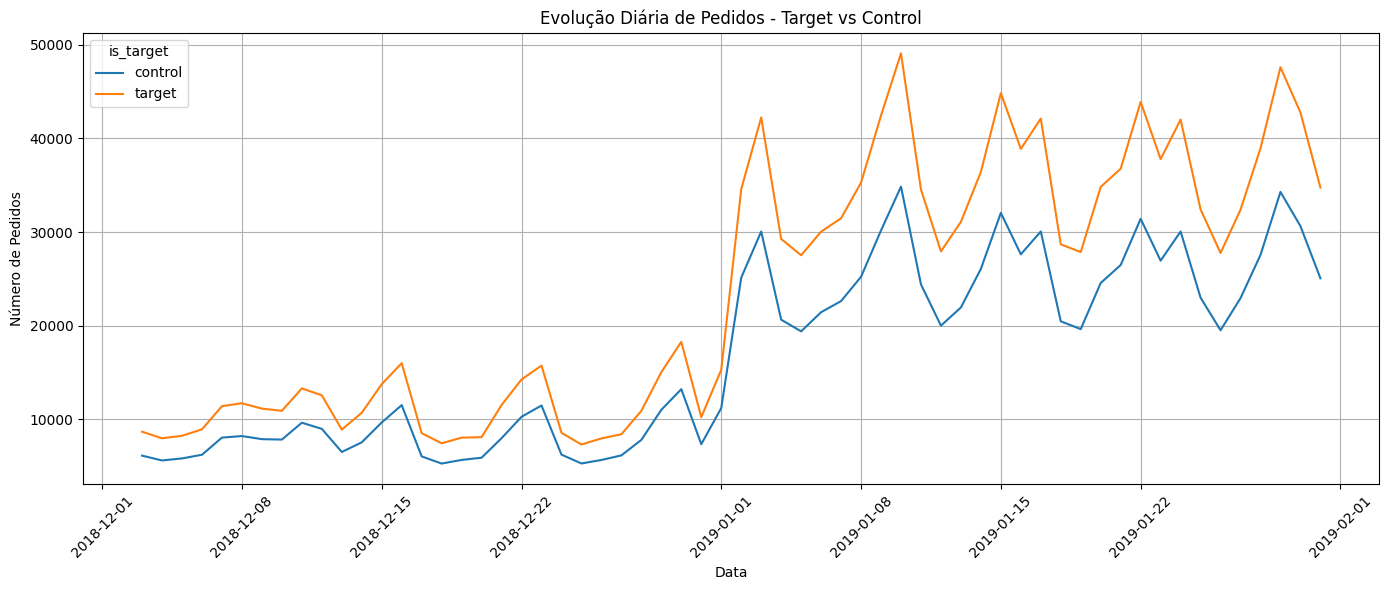

In [25]:
df_evolucao_diaria = evolucao_diaria.toPandas()

plt.figure(figsize=(14,6))
sns.lineplot(data=df_evolucao_diaria, x="data_convertida", y="count(order_id)", hue="is_target")
plt.title("Evolução Diária de Pedidos - Target vs Control")
plt.xlabel("Data")
plt.ylabel("Número de Pedidos")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

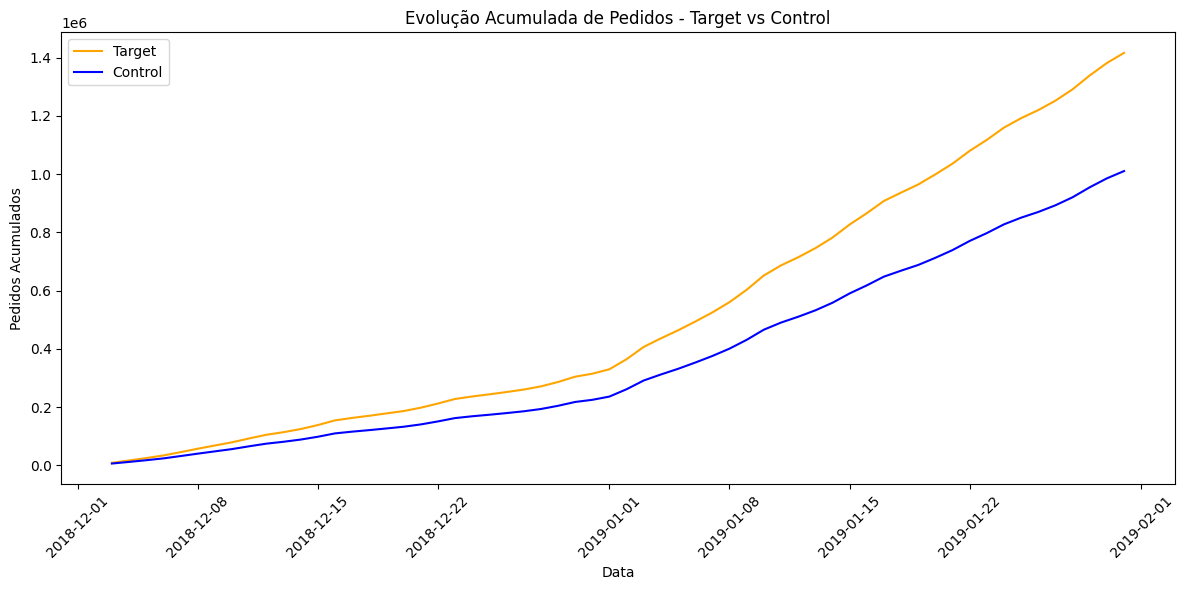

In [26]:
acumulated = orders_cleaned_target.groupBy("data_convertida","is_target").agg(F.count("order_id")).orderBy("data_convertida")
window_spec = Window.partitionBy('is_target').orderBy('data_convertida').rowsBetween(Window.unboundedPreceding, 0)

acumulated = acumulated.withColumn('pedidos_acumulados', F.sum('count(order_id)').over(window_spec))

df_plot = acumulated.toPandas()

df_plot.sort_values(['data_convertida', 'is_target'], inplace=True)


target_df = df_plot[df_plot['is_target'] == 'target']
control_df = df_plot[df_plot['is_target'] == 'control']


plt.figure(figsize=(12, 6))
plt.plot(target_df['data_convertida'], target_df['pedidos_acumulados'], label='Target', color='orange')
plt.plot(control_df['data_convertida'], control_df['pedidos_acumulados'], label='Control', color='blue')

plt.xlabel('Data')
plt.ylabel('Pedidos Acumulados')
plt.title('Evolução Acumulada de Pedidos - Target vs Control')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

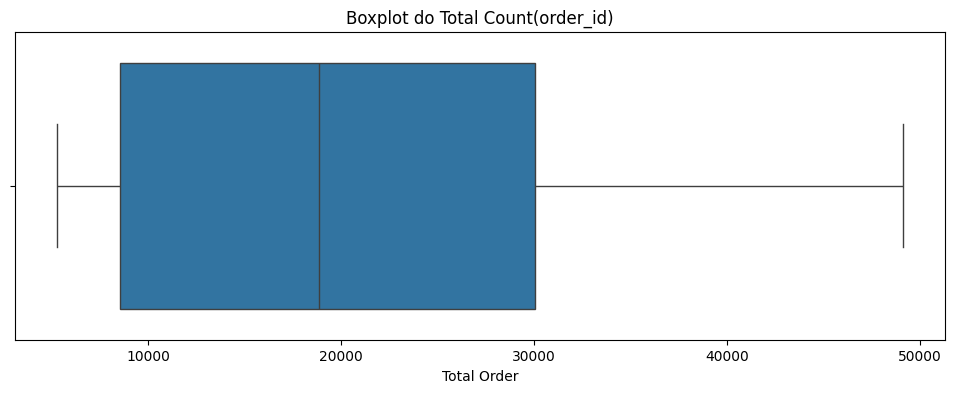

In [27]:
plt.figure(figsize=(12, 4))
sns.boxplot(x=df_evolucao_diaria['count(order_id)'])
plt.title('Boxplot do Total Count(order_id)')
plt.xlabel('Total Order')
plt.show()

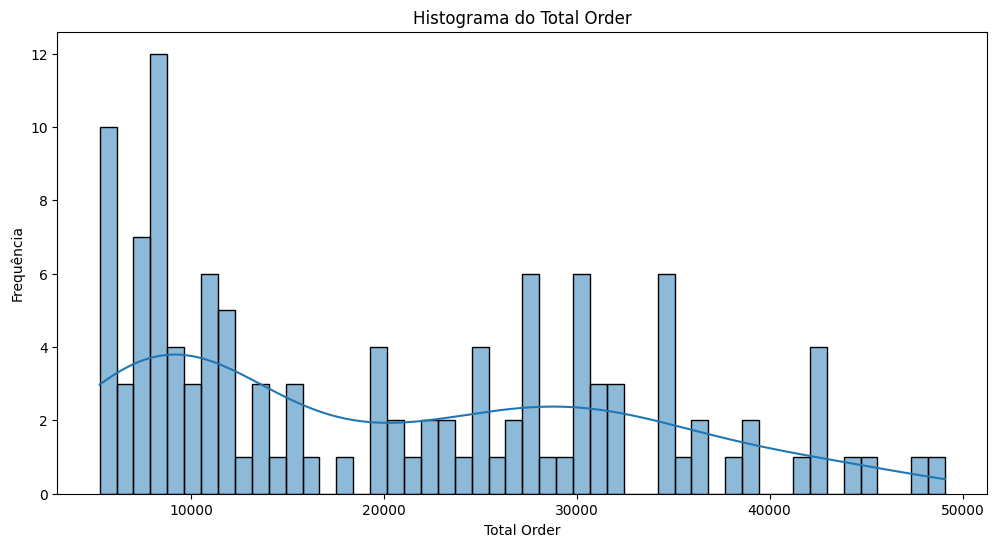

In [28]:
plt.figure(figsize=(12, 6))
sns.histplot(df_evolucao_diaria['count(order_id)'], bins=50, kde=True)
plt.title('Histograma do Total Order')
plt.xlabel('Total Order')
plt.ylabel('Frequência')
plt.show()

In [29]:
def lift(lista_1, lista_2):
  """
  Input: Listas contendo o valor das proporções a serem calculadas, onde lista 1 representa a quantidade que mudou do grupo, e a lista_2 o total daquele grupo
  Output: Lift calculado
  """
  control_lift = (lista_1[0] / lista_2[0]) * 100
  target_lift = (lista_1[1] / lista_2[1]) * 100

  lift = ((target_lift - control_lift) / control_lift) * 100
  print(f'Taxa de retenção Target: {target_lift:.4}%')
  print(f'Taxa de retenção Control: {control_lift:.4}%')
  print(f'Lift: {lift:.4}%')

###1º Métrica:
 Receita por usuário, analisando a distribuição dos dados para o uso de testes paramétricos ou não paramétricos.

 Testando usando método de Shapiro-Wilk

O p-value < 0.05 indica que descartamos a hipótese nula, onde a distribuição seria normal, com isso utilizarei o teste U (Mann-Whitney U Test) nesse caso
O teste Mann-Whitney U é um teste não paramétrico que compara dois grupos (neste caso, grupo Teste e grupo Controle) sem assumir que os dados sigam uma distribuição normal.

Ele funciona avaliando quantas vezes os valores de um grupo são maiores que os do outro grupo quando comparamos todos os pares possíveis entre eles.

Isso significa que ele não compara diretamente médias ou medianas, mas sim a posição relativa (ordenação) dos valores entre os grupos. Se os valores do grupo Teste costumam ser maiores que os do Controle, o estatístico U do Teste será grande.

O valor p-value associado indica se a diferença observada entre os grupos é estatisticamente significativa (ou seja, improvável de ter ocorrido apenas por acaso). Um p-value muito baixo (ex.: 0.0) sugere que há uma diferença real entre os grupos.

In [30]:
sample = orders_cleaned_target_agg.sample(False, 0.015).toPandas()

from scipy.stats import shapiro, anderson, kstest, norm

# Shapiro-Wilk
stat, p = shapiro(sample['total_amount'])
print(f'Shapiro-Wilk p-value: {p}')



Shapiro-Wilk p-value: 3.3846588107195036e-101


/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:586: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 11978.
  res = hypotest_fun_out(*samples, **kwds)


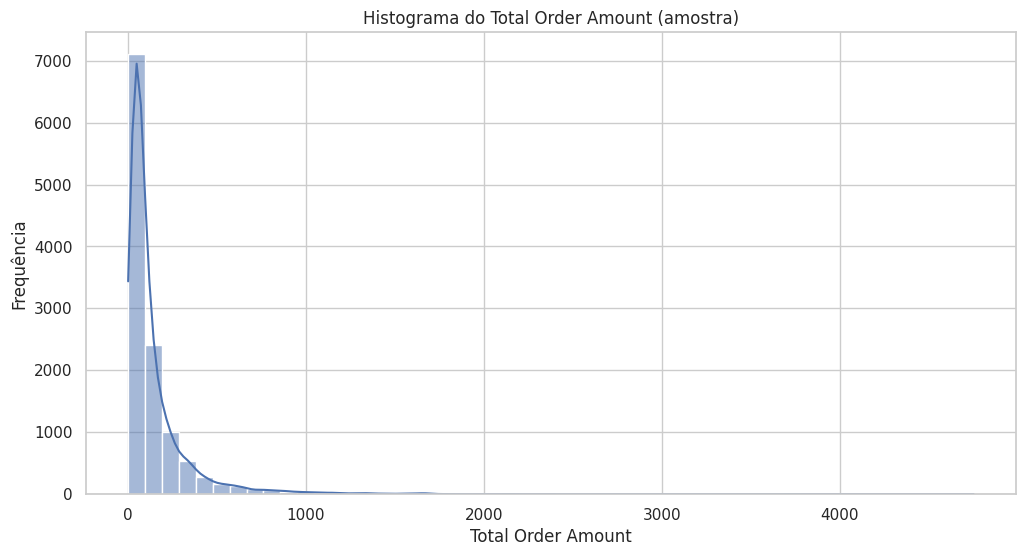

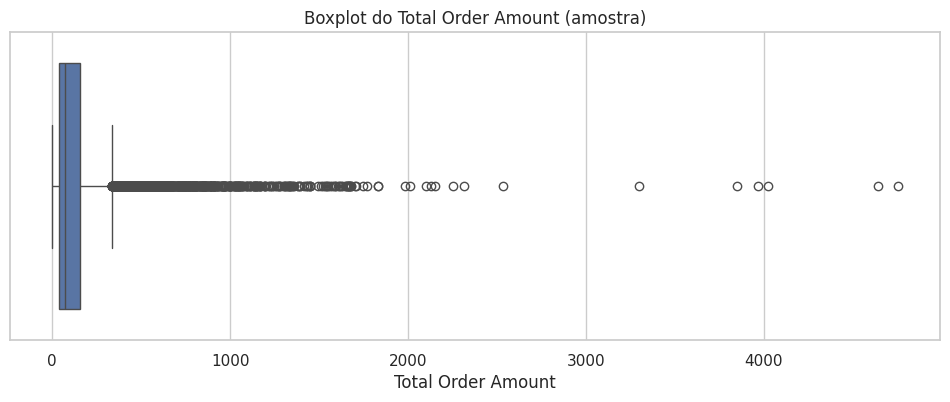

In [31]:
sns.set(style='whitegrid')


plt.figure(figsize=(12, 6))
sns.histplot(sample['total_amount'], bins=50, kde=True)
plt.title('Histograma do Total Order Amount (amostra)')
plt.xlabel('Total Order Amount')
plt.ylabel('Frequência')
plt.show()


plt.figure(figsize=(12, 4))
sns.boxplot(x=sample['total_amount'])
plt.title('Boxplot do Total Order Amount (amostra)')
plt.xlabel('Total Order Amount')
plt.show()

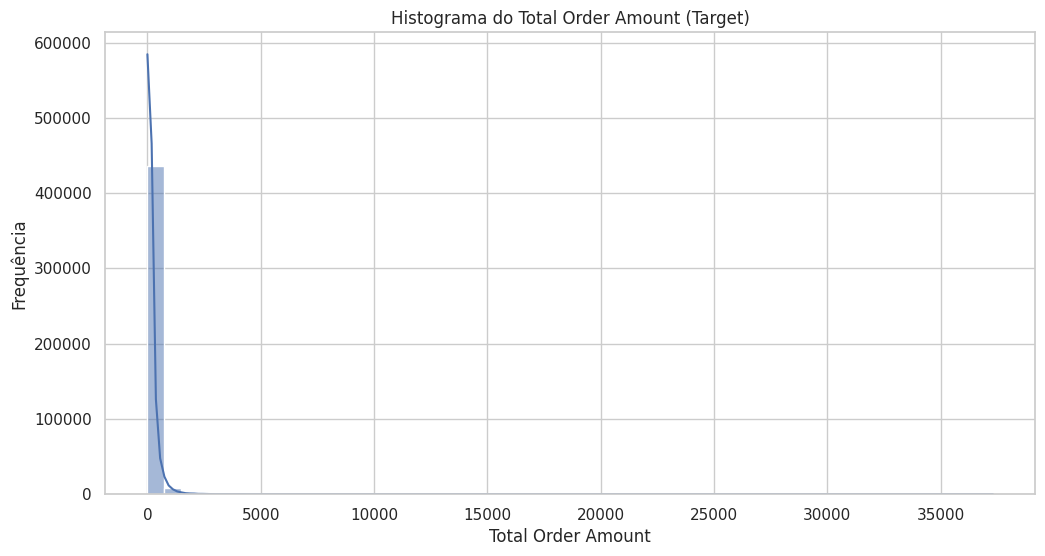

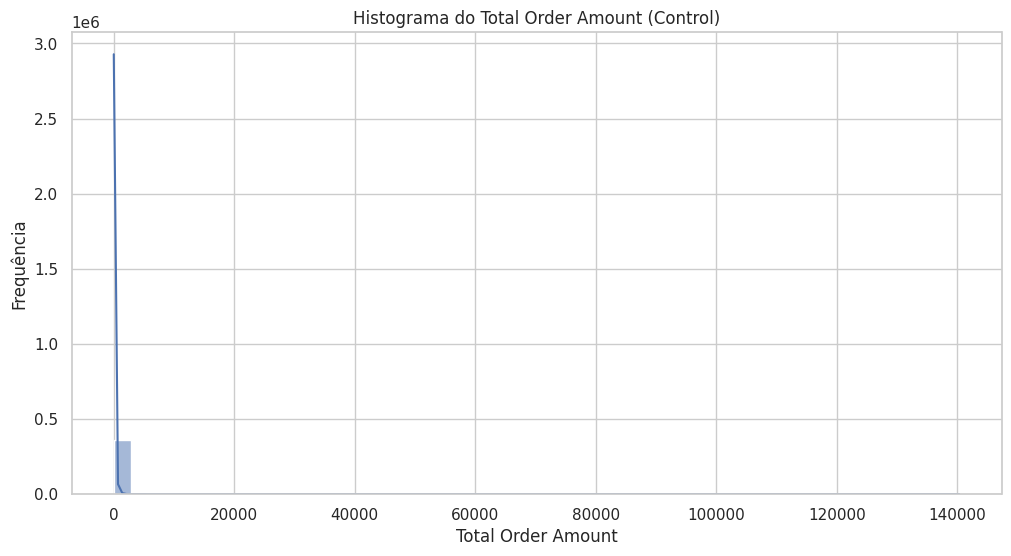

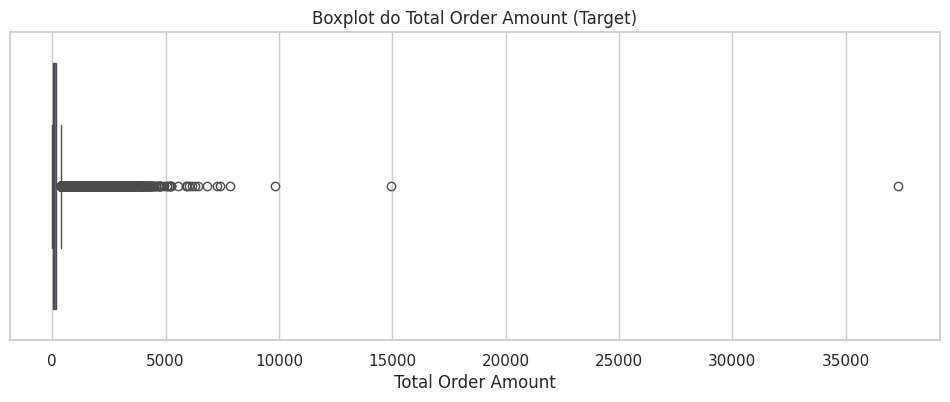

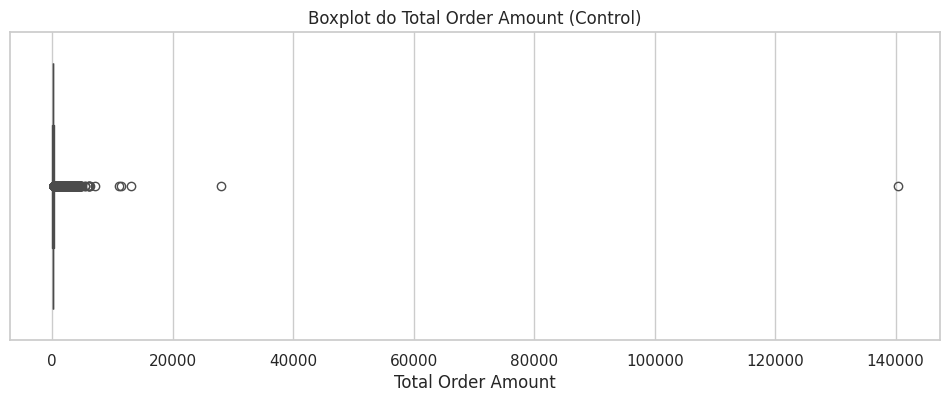

In [35]:
df_data_distribution_order_amount_target = orders_cleaned_target_agg.filter(F.col("is_target")=="target").select("total_amount").toPandas()
df_data_distribution_order_amount_control = orders_cleaned_target_agg.filter(F.col("is_target")=="control").select("total_amount").toPandas()

plt.figure(figsize=(12, 6))
sns.histplot(df_data_distribution_order_amount_target['total_amount'], bins=50, kde=True)
plt.title('Histograma do Total Order Amount (Target)')
plt.xlabel('Total Order Amount')
plt.ylabel('Frequência')


plt.figure(figsize=(12, 6))
sns.histplot(df_data_distribution_order_amount_control['total_amount'], bins=50, kde=True)
plt.title('Histograma do Total Order Amount (Control)')
plt.xlabel('Total Order Amount')
plt.ylabel('Frequência')
plt.show()


plt.figure(figsize=(12, 4))
sns.boxplot(x=df_data_distribution_order_amount_target['total_amount'])
plt.title('Boxplot do Total Order Amount (Target)')
plt.xlabel('Total Order Amount')

plt.figure(figsize=(12, 4))
sns.boxplot(x=df_data_distribution_order_amount_control['total_amount'])
plt.title('Boxplot do Total Order Amount (Control)')
plt.xlabel('Total Order Amount')
plt.show()

In [37]:

quantiles = orders_cleaned_target_agg.approxQuantile('total_amount', [0.25, 0.75], 0.01)
q1, q3 = quantiles
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

df_with_outliers = orders_cleaned_target_agg.withColumn(
    'is_outlier',
    (F.col('total_amount') < lower_bound) | (F.col('total_amount') > upper_bound)
)

metrics_with_outliers = df_with_outliers.groupBy('is_target').agg(
    F.avg('total_amount').alias('avg_total_amount'),
    F.expr('percentile(total_amount, 0.5)').alias('median_total_amount'),
    F.stddev('total_amount').alias('stddev_total_amount'),
    F.count('*').alias('count_orders')
)

pivot_with_outliers = metrics_with_outliers.groupBy().pivot('is_target').agg(
    F.first('avg_total_amount').alias('avg_total_amount'),
    F.first('median_total_amount').alias('median_total_amount'),
    F.first('stddev_total_amount').alias('stddev_total_amount'),
    F.first('count_orders').alias('count_orders')
)

pivot_with_outliers = pivot_with_outliers.withColumn(
    'percent_diff',
    (F.col('target_avg_total_amount') - F.col('control_avg_total_amount')) / F.col('control_avg_total_amount') * 100
)

df_no_outliers = df_with_outliers.filter(~F.col('is_outlier'))

metrics_without_outliers = df_no_outliers.groupBy('is_target').agg(
    F.avg('total_amount').alias('avg_total_amount'),
    F.expr('percentile(total_amount, 0.5)').alias('median_total_amount'),
    F.stddev('total_amount').alias('stddev_total_amount'),
    F.count('*').alias('count_orders')
)

pivot_without_outliers = metrics_without_outliers.groupBy().pivot('is_target').agg(
    F.first('avg_total_amount').alias('avg_total_amount'),
    F.first('median_total_amount').alias('median_total_amount'),
    F.first('stddev_total_amount').alias('stddev_total_amount'),
    F.first('count_orders').alias('count_orders')
)

pivot_without_outliers = pivot_without_outliers.withColumn(
    'percent_diff',
    (F.col('target_avg_total_amount') - F.col('control_avg_total_amount')) / F.col('control_avg_total_amount') * 100
)

print("Métricas COM outliers:")
pivot_with_outliers.show()

print("Métricas SEM outliers:")
pivot_without_outliers.show()


Métricas COM outliers:
+------------------------+---------------------------+---------------------------+--------------------+-----------------------+--------------------------+--------------------------+-------------------+-----------------+
|control_avg_total_amount|control_median_total_amount|control_stddev_total_amount|control_count_orders|target_avg_total_amount|target_median_total_amount|target_stddev_total_amount|target_count_orders|     percent_diff|
+------------------------+---------------------------+---------------------------+--------------------+-----------------------+--------------------------+--------------------------+-------------------+-----------------+
|      134.33269807137867|                       66.7|           316.028471997215|              360413|     151.89904243027925|                      80.2|        229.99825389166799|             445743|13.07674498547373|
+------------------------+---------------------------+---------------------------+---------------

Como identifiquei que os dados não são distribuidos normalmente, usaremos o teste U, testando a passagem dos parâmetros como array numpy diretos para a função afim de comparar performance, porém os ganhos passando como numpy ou séries do pandas foram os mesmos

In [40]:
df_no_outliers = df_no_outliers.toPandas()


df_no_outliers_target = df_no_outliers[df_no_outliers['is_target'] == 'target']['total_amount']
df_no_outliers_control = df_no_outliers[df_no_outliers['is_target'] == 'control']['total_amount']

u_stat, p_value = mannwhitneyu(df_data_distribution_order_amount_control, df_data_distribution_order_amount_target)
print(f"Com outliers - U-statistic: {u_stat}, p-value: {p_value}")


print(f"-"*60)


u_stat, p_value = mannwhitneyu(df_no_outliers_control, df_no_outliers_target)
print(f"Sem outliers - U-statistic: {u_stat}, p-value: {p_value}")

Com outliers - U-statistic: 73569608423.5, p-value: 0.0
------------------------------------------------------------
Sem outliers - U-statistic: 60069337940.5, p-value: 0.0


###2º Métrica:
Taxa de retenção:

Nº de usuários recorrentes (do grupo) / total de usuários (do grupo)

Nº de usuários recorrentes: Contagem dos usuários que realizaram mais de 2 compras no período analisado

- Com o p-valor < 0.05 rejeitamos a hipótese nula. Analisando as métricas de % de retenção, onde o grupo Target teve 57.62% e o Controle teve 47.63%, com um lift de aproximadamente 21%, podemos dizer que em relação a retenção o cupom causou um efeito positivo

In [41]:
users_with_more_2_orders = orders_cleaned_target_agg.filter(F.col("n_orders")>1).groupBy("is_target").agg(F.count("customer_id").alias("n_users"))
users_with_more_2_orders.show(truncate=False)

+---------+-------+
|is_target|n_users|
+---------+-------+
|control  |171650 |
|target   |256819 |
+---------+-------+



In [42]:
n_total_users_per_group = ab_test_exist_consumer.groupBy("is_target").agg(F.count("customer_id").alias("total_users"))
n_total_users_per_group.show()

+---------+-----------+
|is_target|total_users|
+---------+-----------+
|  control|     360413|
|   target|     445743|
+---------+-----------+



In [43]:
df_users_with_more_2_orders = users_with_more_2_orders.toPandas()
df_n_total_users_per_group = n_total_users_per_group.toPandas()

list_users_with_more_2_orders = df_users_with_more_2_orders['n_users'].tolist()
list_n_total_users_per_group = df_n_total_users_per_group['total_users'].tolist()

list_users_with_more_2_orders, list_n_total_users_per_group
#control,target     control,target

([171650, 256819], [360413, 445743])

In [44]:
from statsmodels.stats.proportion import proportions_ztest

stat, p_value = proportions_ztest(list_users_with_more_2_orders, list_n_total_users_per_group)

print(f'Estatística Z: {stat:.4f}')
print(f'p-value: {p_value:.4f}')

lift(list_users_with_more_2_orders,list_n_total_users_per_group)

Estatística Z: -89.3702
p-value: 0.0000
Taxa de retenção Target: 57.62%
Taxa de retenção Control: 47.63%
Lift: 20.98%


###3º Métrica:
Taxa de perda de usuários

Taxa de perda se da pelo Nº de usuários que compraram apenas uma vez (não tivemos recorrência) / Nº total de usuários

Nesse caso o cupom não teve uma influência positiva, no caso a taxa de usuários que compraram apenas uma vez foi maior no grupo Target

In [45]:
users_with_1_order = orders_cleaned_target_agg.filter(F.col("n_orders") == 1).groupBy("is_target").agg(F.count("customer_id").alias("n_users"))
users_with_1_order.show()

+---------+-------+
|is_target|n_users|
+---------+-------+
|  control| 188763|
|   target| 188924|
+---------+-------+



In [46]:
df_users_with_1_order = users_with_1_order.toPandas()
list_users_with_1_order = df_users_with_1_order['n_users'].tolist()

stat, p_value = proportions_ztest(list_users_with_1_order, list_n_total_users_per_group)

print(f'Estatística Z: {stat:.4f}')
print(f'p-value: {p_value:.4f}')

lift(list_users_with_1_order, list_n_total_users_per_group)

Estatística Z: 89.3702
p-value: 0.0000
Taxa de retenção Target: 42.38%
Taxa de retenção Control: 52.37%
Lift: -19.07%


###4º Métrica:
Latência entre os pedidos

Como o p_value > 0.05 mantemos a hipótese nula (o cupom não influenciou na mudança da latência dos pedidos)

In [47]:
order_selected = orders_cleaned_target.select("customer_id","is_target","data_convertida")

window_func = Window.partitionBy("customer_id").orderBy("data_convertida")

orders_latency = order_selected.withColumn(
    "prev_order",
    F.lag("data_convertida").over(window_func))\
    .withColumn(
    "days_diff",
    F.datediff("data_convertida", "prev_order"))

orders_latency = orders_latency.filter(F.col('days_diff').isNotNull())
orders_latency.show(truncate=False)

+----------------------------------------------------------------+---------+---------------+----------+---------+
|customer_id                                                     |is_target|data_convertida|prev_order|days_diff|
+----------------------------------------------------------------+---------+---------------+----------+---------+
|0051f30fea7dbc96c07a13e2d859ddb828d14f1a5f688c9f60fb1b4ebc10e8fb|target   |2018-12-12     |2018-12-05|7        |
|0051f30fea7dbc96c07a13e2d859ddb828d14f1a5f688c9f60fb1b4ebc10e8fb|target   |2018-12-13     |2018-12-12|1        |
|0051f30fea7dbc96c07a13e2d859ddb828d14f1a5f688c9f60fb1b4ebc10e8fb|target   |2018-12-19     |2018-12-13|6        |
|0051f30fea7dbc96c07a13e2d859ddb828d14f1a5f688c9f60fb1b4ebc10e8fb|target   |2019-01-02     |2018-12-19|14       |
|0051f30fea7dbc96c07a13e2d859ddb828d14f1a5f688c9f60fb1b4ebc10e8fb|target   |2019-01-06     |2019-01-02|4        |
|0051f30fea7dbc96c07a13e2d859ddb828d14f1a5f688c9f60fb1b4ebc10e8fb|target   |2019-01-07  

In [48]:
order_latency_avg = orders_latency.groupBy("customer_id", "is_target").agg(F.avg("days_diff").alias("avg_days_diff"))
order_latency_avg.show(truncate=False)

+----------------------------------------------------------------+---------+-----------------+
|customer_id                                                     |is_target|avg_days_diff    |
+----------------------------------------------------------------+---------+-----------------+
|0051f30fea7dbc96c07a13e2d859ddb828d14f1a5f688c9f60fb1b4ebc10e8fb|target   |4.833333333333333|
|0098ff85fe0225ae2438f5d2357c610d89bb2c38d82be43bc7d801e1ec1b0e01|target   |7.666666666666667|
|00b0779e1dff3f8276de4c12dbfd8cc2a389f9104d814c8a6fac987068030952|target   |3.5625           |
|00b42e8b5bfbbbe66fb6c81c1adeb282da0a8f281d7101ceacaf054476de7d00|target   |15.0             |
|00c2ec14a07eb42ddb4972c9c4bc4b4d835c9e9b7c0395cf125242f6aac86e50|control  |20.5             |
|00d367f7c63a8a19e6c701186d7ee0d20f1b12132eb4dd6b5d9c5b237d691454|target   |4.4              |
|012d2963dced1e6e19409192e09424f6d049a2b244ead12ccb2e5c501aedfd9c|target   |19.0             |
|0141c4874b537f9e4017d0ceefd1ae369fcd1fe24cf368e9d

Avaliando a distribuição dos dados

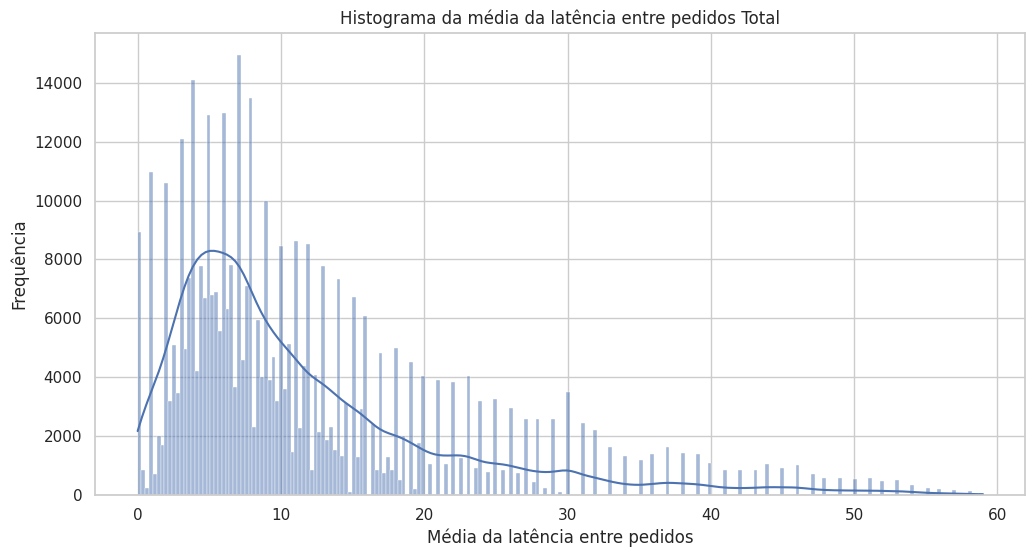

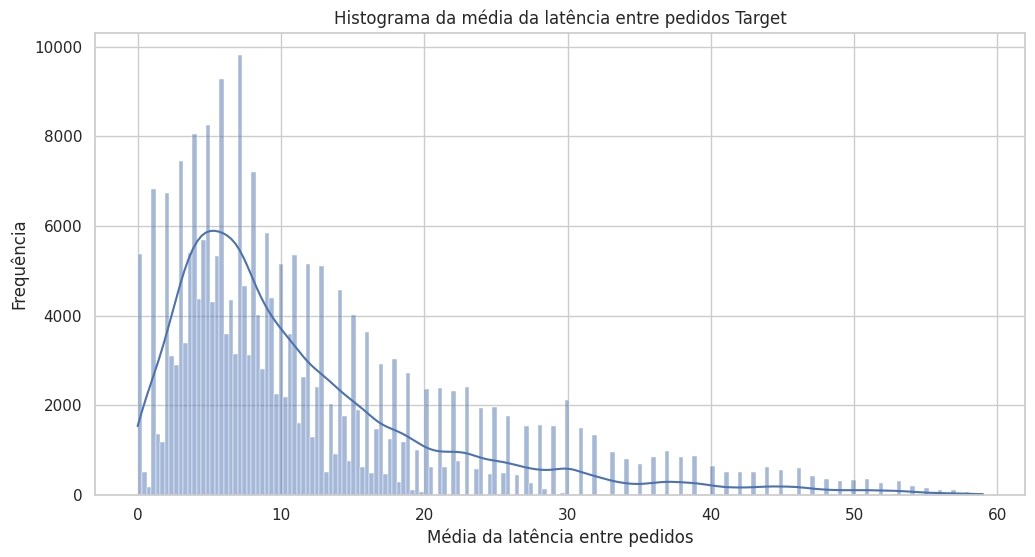

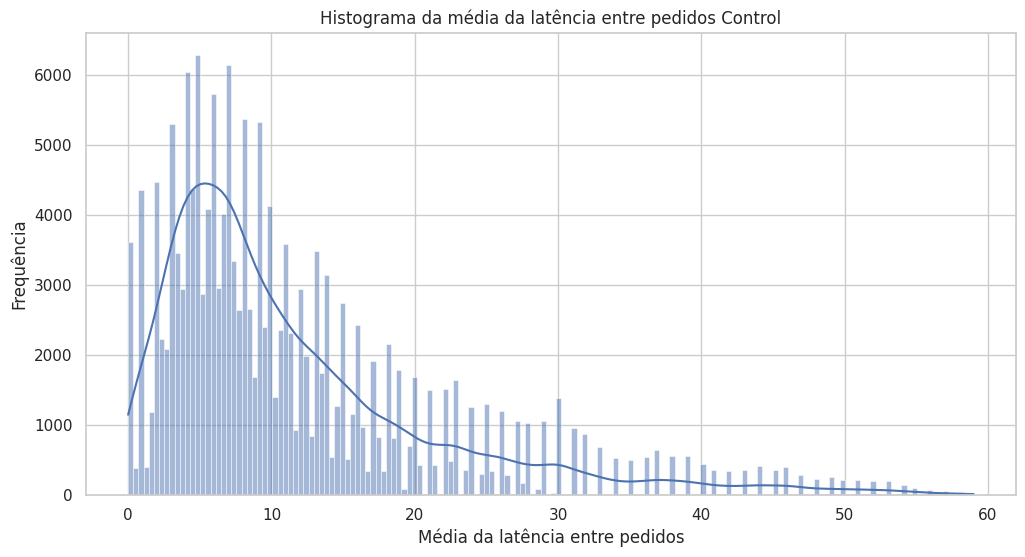

In [49]:
df_order_latency_avg = order_latency_avg.toPandas()

plt.figure(figsize=(12, 6))
sns.histplot(df_order_latency_avg['avg_days_diff'], kde=True)
plt.title('Histograma da média da latência entre pedidos Total')
plt.xlabel('Média da latência entre pedidos')
plt.ylabel('Frequência')

plt.figure(figsize=(12, 6))
sns.histplot(df_order_latency_avg[df_order_latency_avg['is_target']=='target']['avg_days_diff'], kde=True)
plt.title('Histograma da média da latência entre pedidos Target')
plt.xlabel('Média da latência entre pedidos')
plt.ylabel('Frequência')

plt.figure(figsize=(12, 6))
sns.histplot(df_order_latency_avg[df_order_latency_avg['is_target']=='control']['avg_days_diff'], kde=True)
plt.title('Histograma da média da latência entre pedidos Control')
plt.xlabel('Média da latência entre pedidos')
plt.ylabel('Frequência')

plt.show()

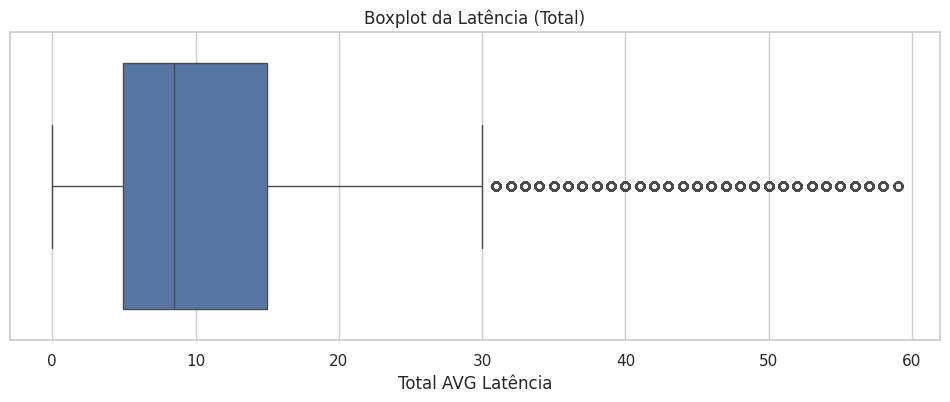

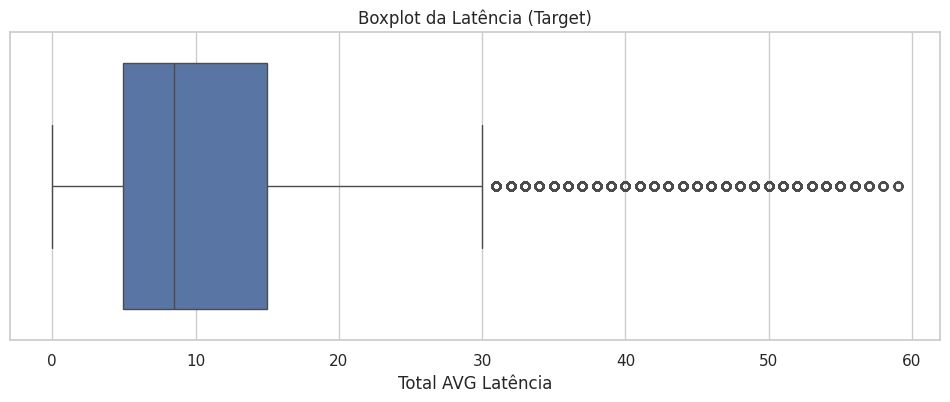

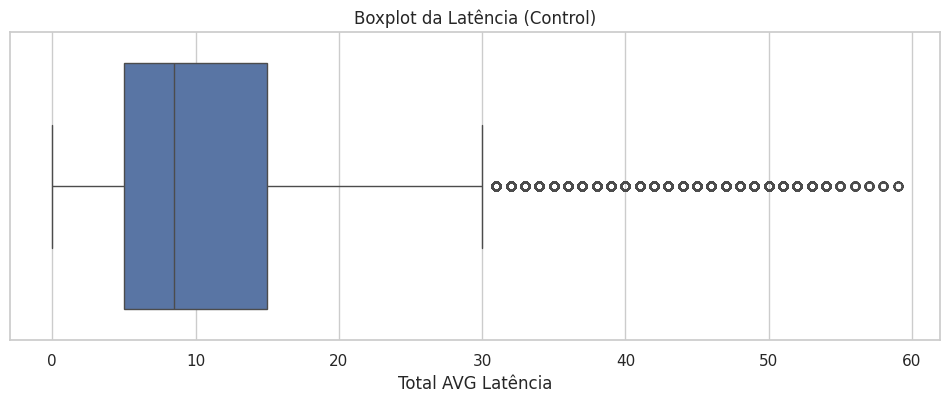

In [50]:
plt.figure(figsize=(12, 4))
sns.boxplot(x=df_order_latency_avg['avg_days_diff'])
plt.title('Boxplot da Latência (Total)')
plt.xlabel('Total AVG Latência')

plt.figure(figsize=(12, 4))
sns.boxplot(x=df_order_latency_avg[df_order_latency_avg['is_target']=='target']['avg_days_diff'])
plt.title('Boxplot da Latência (Target)')
plt.xlabel('Total AVG Latência')

plt.figure(figsize=(12, 4))
sns.boxplot(x=df_order_latency_avg[df_order_latency_avg['is_target']=='control']['avg_days_diff'])
plt.title('Boxplot da Latência (Control)')
plt.xlabel('Total AVG Latência')
plt.show()

Identificado que a distribuição não é normal

In [51]:
quantiles = order_latency_avg.approxQuantile('avg_days_diff', [0.25, 0.75], 0.01)
q1, q3 = quantiles
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

order_latency_avg_with_outliers = order_latency_avg.withColumn(
    'is_outlier',
    (F.col('avg_days_diff') < lower_bound) | (F.col('avg_days_diff') > upper_bound)
)

order_latency_avg_without_outliers = order_latency_avg_with_outliers.filter(~F.col('is_outlier'))

df_order_latency_avg_with_outliers =  order_latency_avg_with_outliers.toPandas()
df_order_latency_avg_without_outliers =  order_latency_avg_without_outliers.toPandas()

list_order_latency_avg_with_outliers_target =  df_order_latency_avg_with_outliers[df_order_latency_avg_with_outliers['is_target']=='target']['avg_days_diff']
list_order_latency_avg_without_outliers_target =  df_order_latency_avg_without_outliers[df_order_latency_avg_without_outliers['is_target']=='target']['avg_days_diff']

list_order_latency_avg_with_outliers_control =  df_order_latency_avg_with_outliers[df_order_latency_avg_with_outliers['is_target']=='control']['avg_days_diff']
list_order_latency_avg_without_outliers_control =  df_order_latency_avg_without_outliers[df_order_latency_avg_without_outliers['is_target']=='control']['avg_days_diff']

u_stat, p_value = mannwhitneyu(list_order_latency_avg_with_outliers_control, list_order_latency_avg_with_outliers_target)
print(f"Com outliers - U-statistic: {u_stat}, p-value: {p_value}")


print(f"-"*60)


u_stat, p_value = mannwhitneyu(list_order_latency_avg_without_outliers_control, list_order_latency_avg_without_outliers_target)
print(f"Sem outliers - U-statistic: {u_stat}, p-value: {p_value}")

Com outliers - U-statistic: 22039799573.5, p-value: 0.9659970711009029
------------------------------------------------------------
Sem outliers - U-statistic: 19417938780.5, p-value: 0.7283465501459454


###5º Métrica:
Quantidade de pedidos por usuário

**Com o p-valor < 0.05 e as métricas:**

Média Test: 3.177162625100114

Média Control: 2.803428289212653

Mediana Test: 2.0

Mediana Control: 1.0

Lift absoluto: 0.37

Lift relativo: 13.33%

**Podemos dizer que o cupom teve um impacto positivo na quanidade de pedidos por usuários**

- Podemos observar uma calda a direita maior no target em relação ao control, o que pode indicar um aumento do número de pedido por conta do cupom

Text(0, 0.5, 'Frequência')

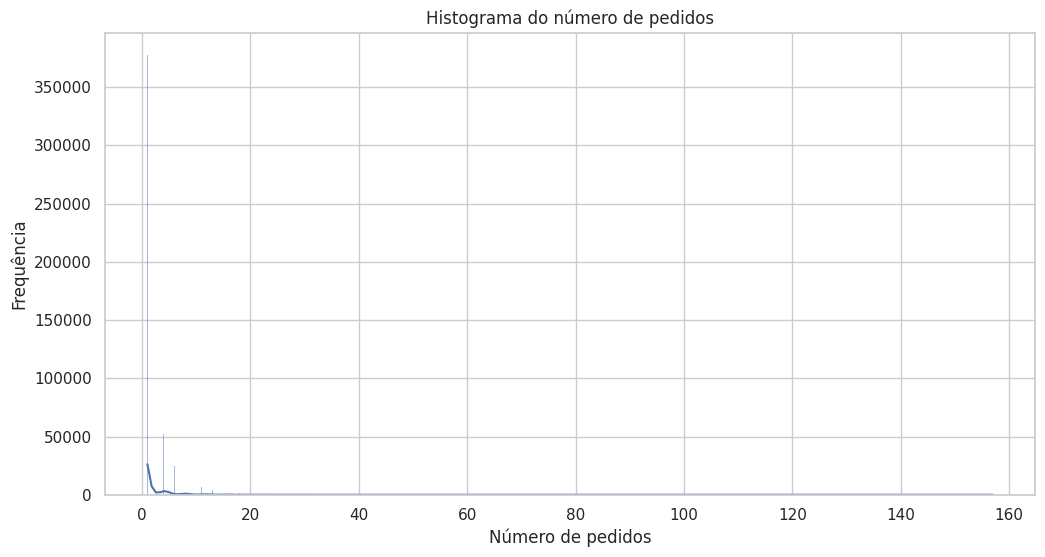

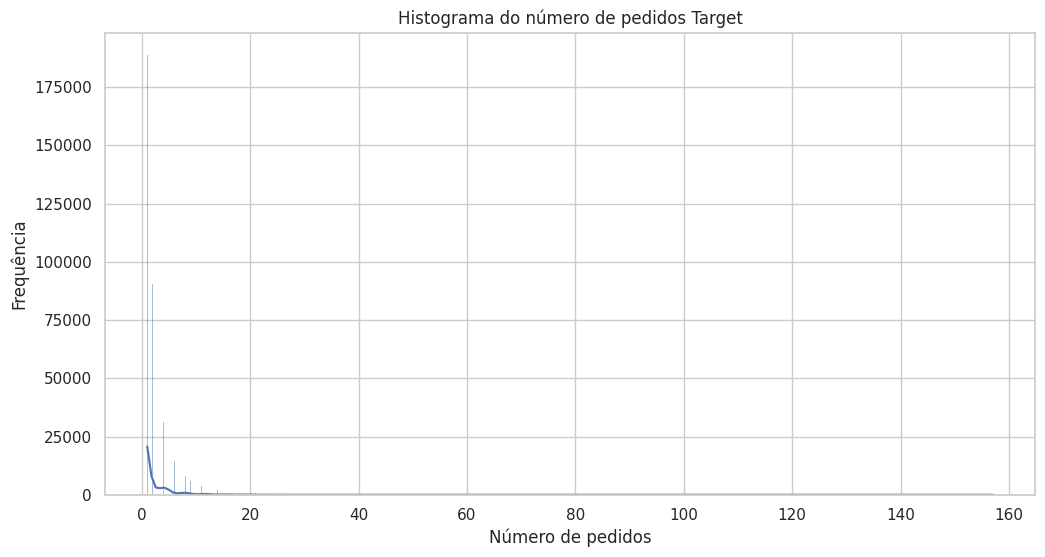

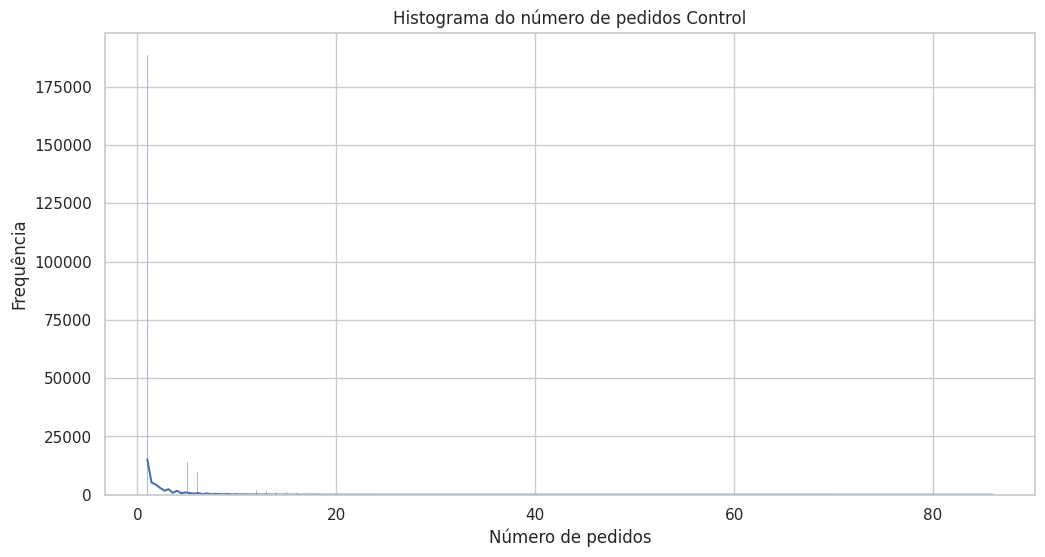

In [52]:
df_users_with_the_number_of_orders = orders_cleaned_target_agg.toPandas()

plt.figure(figsize=(12, 6))
sns.histplot(df_users_with_the_number_of_orders['n_orders'], kde=True)
plt.title('Histograma do número de pedidos')
plt.xlabel('Número de pedidos')
plt.ylabel('Frequência')

plt.figure(figsize=(12, 6))
sns.histplot(df_users_with_the_number_of_orders[df_users_with_the_number_of_orders['is_target']=='target']['n_orders'], kde=True)
plt.title('Histograma do número de pedidos Target')
plt.xlabel('Número de pedidos')
plt.ylabel('Frequência')

plt.figure(figsize=(12, 6))
sns.histplot(df_users_with_the_number_of_orders[df_users_with_the_number_of_orders['is_target']=='control']['n_orders'], kde=True)
plt.title('Histograma do número de pedidos Control')
plt.xlabel('Número de pedidos')
plt.ylabel('Frequência')

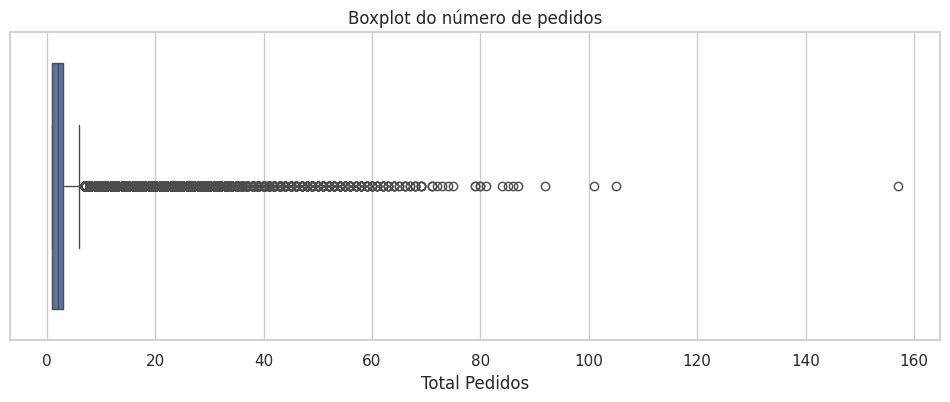

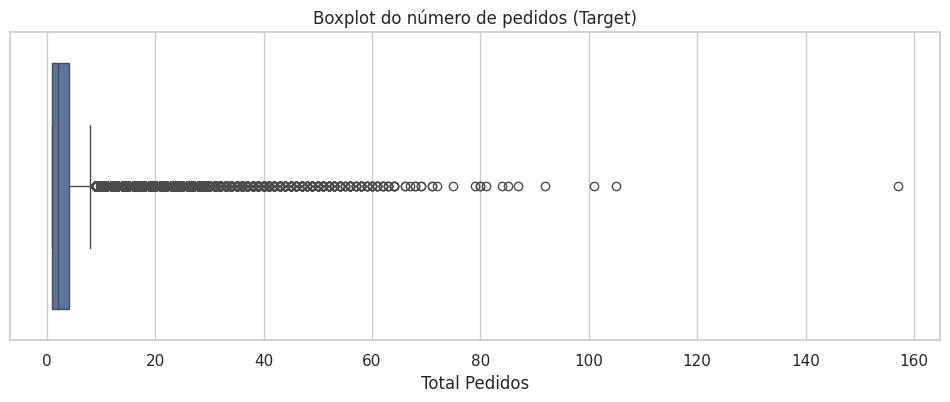

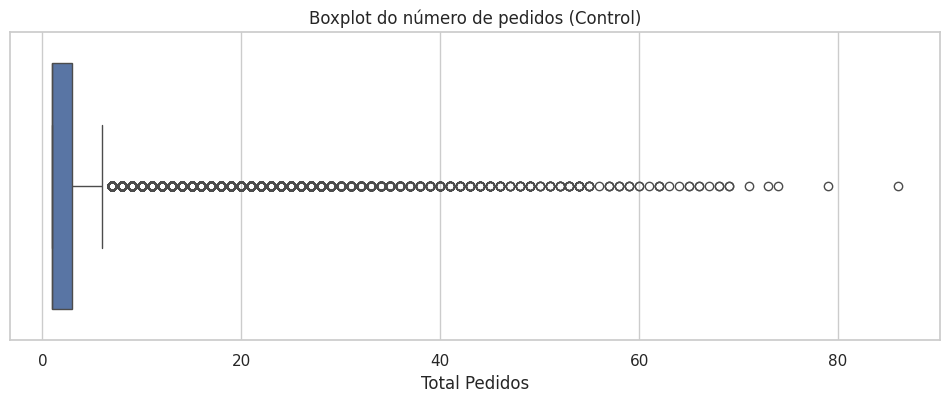

In [53]:
plt.figure(figsize=(12, 4))
sns.boxplot(x=df_users_with_the_number_of_orders['n_orders'])
plt.title('Boxplot do número de pedidos')
plt.xlabel('Total Pedidos')

plt.figure(figsize=(12, 4))
sns.boxplot(x=df_users_with_the_number_of_orders[df_users_with_the_number_of_orders['is_target']=='target']['n_orders'])
plt.title('Boxplot do número de pedidos (Target)')
plt.xlabel('Total Pedidos')

plt.figure(figsize=(12, 4))
sns.boxplot(x=df_users_with_the_number_of_orders[df_users_with_the_number_of_orders['is_target']=='control']['n_orders'])
plt.title('Boxplot do número de pedidos (Control)')
plt.xlabel('Total Pedidos')
plt.show()

In [54]:
quantiles = orders_cleaned_target_agg.approxQuantile('n_orders', [0.25, 0.75], 0.01)
q1, q3 = quantiles
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

users_with_the_number_of_orders_with_outliers = orders_cleaned_target_agg.withColumn(
    'is_outlier',
    (F.col('n_orders') < lower_bound) | (F.col('n_orders') > upper_bound)
)

users_with_the_number_of_orders_without_outliers = users_with_the_number_of_orders_with_outliers.filter(~F.col('is_outlier'))

df_users_with_the_number_of_orders_with_outliers =  users_with_the_number_of_orders_with_outliers.toPandas()
df_users_with_the_number_of_orders_without_outliers =  users_with_the_number_of_orders_without_outliers.toPandas()

list_users_with_the_number_of_orders_with_outliers_target =  df_users_with_the_number_of_orders_with_outliers[df_users_with_the_number_of_orders_with_outliers['is_target']=='target']['n_orders']
list_users_with_the_number_of_orders_without_outlier_target =  df_users_with_the_number_of_orders_without_outliers[df_users_with_the_number_of_orders_without_outliers['is_target']=='target']['n_orders']

list_users_with_the_number_of_orders_with_outliers_control =  df_users_with_the_number_of_orders_with_outliers[df_users_with_the_number_of_orders_with_outliers['is_target']=='control']['n_orders']
list_users_with_the_number_of_orders_without_outlier_control =  df_users_with_the_number_of_orders_without_outliers[df_users_with_the_number_of_orders_without_outliers['is_target']=='control']['n_orders']

u_stat, p_value = mannwhitneyu(list_users_with_the_number_of_orders_with_outliers_control, list_users_with_the_number_of_orders_with_outliers_target)
print(f"Com outliers - U-statistic: {u_stat}, p-value: {p_value}")


print(f"-"*60)


u_stat, p_value = mannwhitneyu(list_users_with_the_number_of_orders_without_outlier_control, list_users_with_the_number_of_orders_without_outlier_target)
print(f"Sem outliers - U-statistic: {u_stat}, p-value: {p_value}")

Com outliers - U-statistic: 72356415266.5, p-value: 0.0
------------------------------------------------------------
Sem outliers - U-statistic: 58219337077.5, p-value: 0.0


In [55]:

print('Média Test com Outlier:', np.mean(list_users_with_the_number_of_orders_with_outliers_target))
print('Média Control com Outlier:', np.mean(list_users_with_the_number_of_orders_with_outliers_control))
print('Mediana Test com Outlier:', np.median(list_users_with_the_number_of_orders_with_outliers_target))
print('Mediana Control com Outlier:', np.median(list_users_with_the_number_of_orders_with_outliers_control))

mean_target_outlier = list_users_with_the_number_of_orders_with_outliers_target.mean()
mean_control_outlier = list_users_with_the_number_of_orders_with_outliers_control.mean()

abs_lift = mean_target_outlier - mean_control_outlier
rel_lift = (mean_target_outlier - mean_control_outlier) / mean_control_outlier
rel_lift_pct = rel_lift * 100

print(f'Lift absoluto com Outlier: {abs_lift:.2f}')
print(f'Lift relativo com Outlier: {rel_lift_pct:.2f}%')


print(f"-"*100)

print('Média Test sem Outlier:', np.mean(list_users_with_the_number_of_orders_without_outlier_target))
print('Média Control sem Outlier:', np.mean(list_users_with_the_number_of_orders_without_outlier_control))
print('Mediana Test sem Outlier:', np.median(list_users_with_the_number_of_orders_without_outlier_target))
print('Mediana Control sem Outlier:', np.median(list_users_with_the_number_of_orders_without_outlier_control))

mean_target_without_outlier = list_users_with_the_number_of_orders_without_outlier_target.mean()
mean_control_without_outlier = list_users_with_the_number_of_orders_without_outlier_control.mean()

abs_lift = mean_target_without_outlier - mean_control_without_outlier
rel_lift = (mean_target_without_outlier - mean_control_without_outlier) / mean_control_without_outlier
rel_lift_pct = rel_lift * 100

print(f'Lift absoluto sem outlier: {abs_lift:.2f}')
print(f'Lift relativo sem Outlier: {rel_lift_pct:.2f}%')

Média Test com Outlier: 3.177162625100114
Média Control com Outlier: 2.803428289212653
Mediana Test com Outlier: 2.0
Mediana Control com Outlier: 1.0
Lift absoluto com Outlier: 0.37
Lift relativo com Outlier: 13.33%
----------------------------------------------------------------------------------------------------
Média Test sem Outlier: 2.110910819297456
Média Control sem Outlier: 1.9018433066914726
Mediana Test sem Outlier: 2.0
Mediana Control sem Outlier: 1.0
Lift absoluto sem outlier: 0.21
Lift relativo sem Outlier: 10.99%


###6º Métrica:
Volume de itens por pedido

**p_value < 0.05**, por tanto descartamos a hipótese nula e observamos que o target conseguiu melhores métricas

Média Test: 7.4474589961632525

Média Control: 6.566888472040313

Mediana Test: 4.0

Mediana Control: 3.0

Desvio Padrão Test: 11.875350320107616

Desvio Padrão Control: 11.773764615164625

Lift absoluto: 0.88

Lift relativo: 13.41%

In [57]:
order_exploded = orders_cleaned_target.withColumn(
    "item",
    F.explode("items")
)
order_exploded.show(truncate=False)

+----------------------------------------------------------------+----------------------------------------------------------------+---------+---------------+-----------------------------------------------------------------------------------+------------------+------+---------------+-----------+-----------------------+-------------------------------------------+
|order_id                                                        |customer_id                                                     |is_target|data_convertida|items                                                                              |order_total_amount|active|origin_platform|price_range|created_at_consumer    |item                                       |
+----------------------------------------------------------------+----------------------------------------------------------------+---------+---------------+-----------------------------------------------------------------------------------+------------------+------+-----

In [58]:
order_exploded_quantity = order_exploded.groupBy("customer_id","is_target").agg(F.sum("item.quantity").alias("item_quantity"))
order_exploded_quantity.show(truncate=False)

+----------------------------------------------------------------+---------+-------------+
|customer_id                                                     |is_target|item_quantity|
+----------------------------------------------------------------+---------+-------------+
|004dc916e193d924b1c1ccd3199da900f6568e803f3c5d3175a5f6b5fc670224|control  |2.0          |
|00515897b190757b562c223e99ceb9b978db8bff264204a682acd828b46d2d21|target   |2.0          |
|0051f30fea7dbc96c07a13e2d859ddb828d14f1a5f688c9f60fb1b4ebc10e8fb|target   |17.0         |
|00603012fa517662dd4e69bafc97259d98b4ef45be67efc429e100f71edcc76b|target   |4.0          |
|0064856426427c3ecfa7b10b58356504d3660d5803bed8930eed88dee7b2b4e3|target   |2.0          |
|0098ff85fe0225ae2438f5d2357c610d89bb2c38d82be43bc7d801e1ec1b0e01|target   |20.0         |
|00b0779e1dff3f8276de4c12dbfd8cc2a389f9104d814c8a6fac987068030952|target   |31.0         |
|00b42e8b5bfbbbe66fb6c81c1adeb282da0a8f281d7101ceacaf054476de7d00|target   |2.0          |

Verificando distribuição

Text(0, 0.5, 'Frequência')

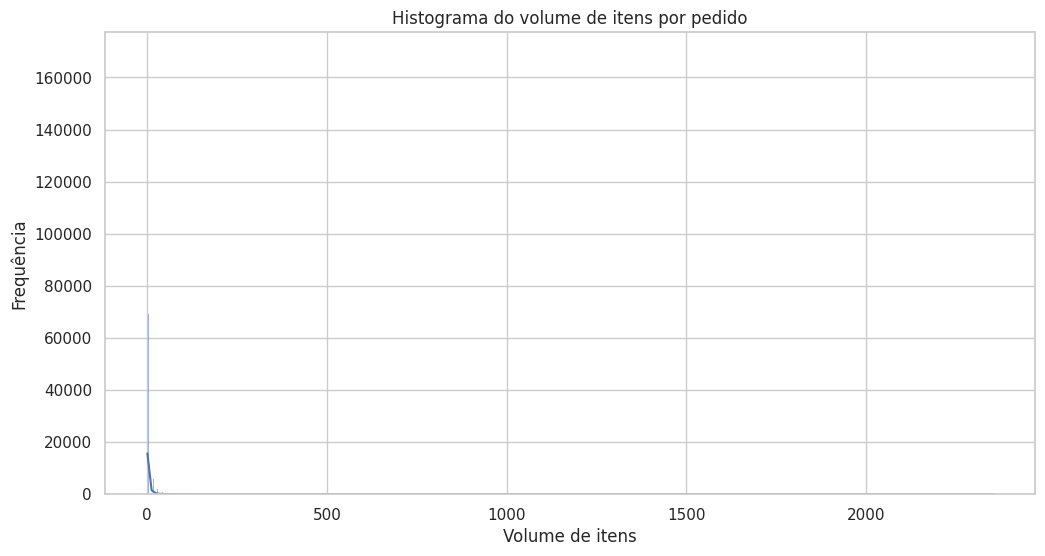

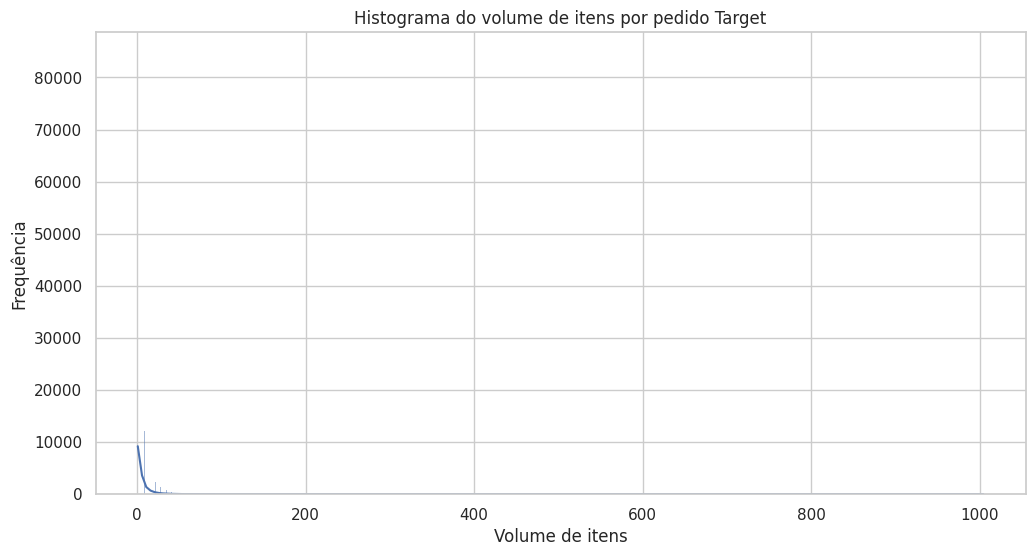

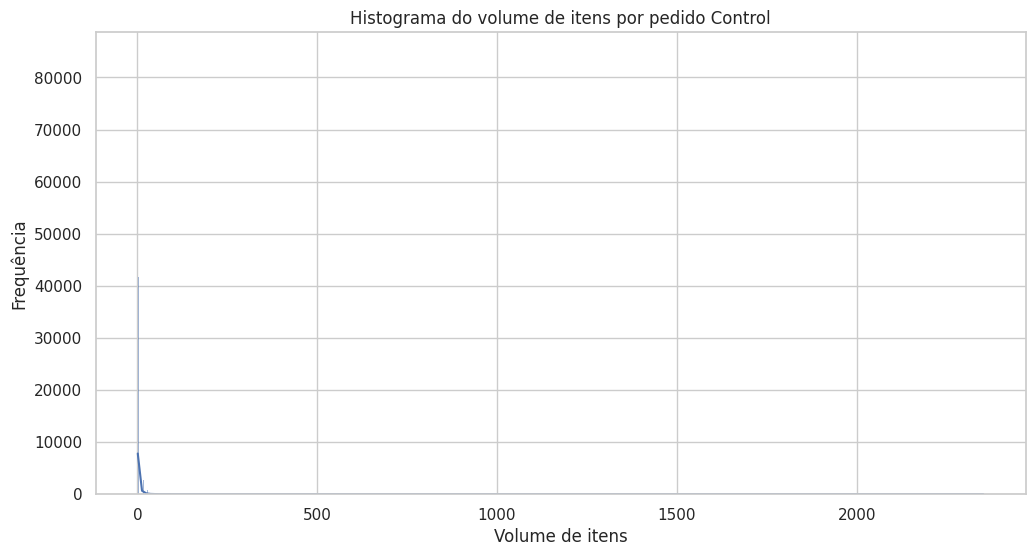

In [59]:
df_order_exploded_quantity = order_exploded_quantity.toPandas()

plt.figure(figsize=(12, 6))
sns.histplot(df_order_exploded_quantity['item_quantity'], kde=True)
plt.title('Histograma do volume de itens por pedido')
plt.xlabel('Volume de itens')
plt.ylabel('Frequência')

plt.figure(figsize=(12, 6))
sns.histplot(df_order_exploded_quantity[df_order_exploded_quantity['is_target']=='target']['item_quantity'], kde=True)
plt.title('Histograma do volume de itens por pedido Target')
plt.xlabel('Volume de itens')
plt.ylabel('Frequência')

plt.figure(figsize=(12, 6))
sns.histplot(df_order_exploded_quantity[df_order_exploded_quantity['is_target']=='control']['item_quantity'], kde=True)
plt.title('Histograma do volume de itens por pedido Control')
plt.xlabel('Volume de itens')
plt.ylabel('Frequência')

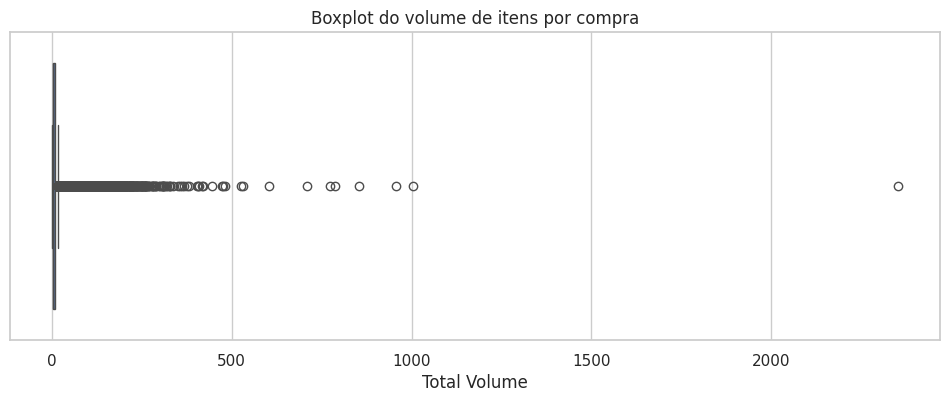

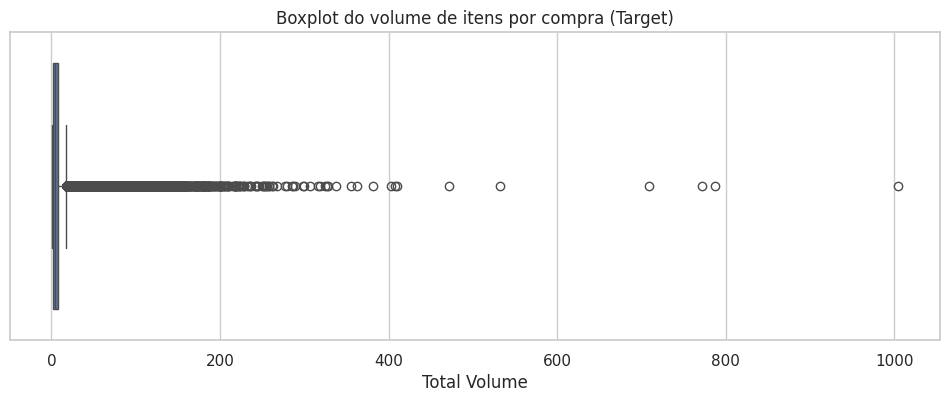

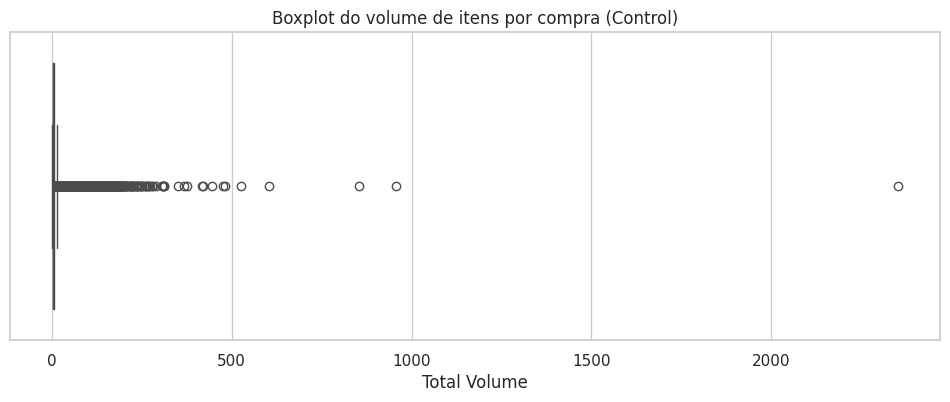

In [60]:
plt.figure(figsize=(12, 4))
sns.boxplot(x=df_order_exploded_quantity['item_quantity'])
plt.title('Boxplot do volume de itens por compra')
plt.xlabel('Total Volume')

plt.figure(figsize=(12, 4))
sns.boxplot(x=df_order_exploded_quantity[df_order_exploded_quantity['is_target']=='target']['item_quantity'])
plt.title('Boxplot do volume de itens por compra (Target)')
plt.xlabel('Total Volume')

plt.figure(figsize=(12, 4))
sns.boxplot(x=df_order_exploded_quantity[df_order_exploded_quantity['is_target']=='control']['item_quantity'])
plt.title('Boxplot do volume de itens por compra (Control)')
plt.xlabel('Total Volume')
plt.show()

In [61]:
order_exploded_quantity.filter(F.col("item_quantity")>=2000).show(truncate=False)

+----------------------------------------------------------------+---------+-------------+
|customer_id                                                     |is_target|item_quantity|
+----------------------------------------------------------------+---------+-------------+
|361e229dbc1b985e1aacb3e70384782a05d77ad6db53e7e511fe2147ee09a890|control  |2352.0       |
+----------------------------------------------------------------+---------+-------------+



In [62]:
orders_cleaned_target.filter(F.col("customer_id").contains("361e229dbc1b985e1aacb3e70384782a05d77ad6db53e7e511fe2147ee09a890")).show(truncate=False)


+----------------------------------------------------------------+----------------------------------------------------------------+---------+---------------+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+------------------+------+---------------+-----------+-----------------------+
|order_id                                                        |customer_id                                                     |is_target|data_convertida|items                                                                                        

In [63]:
sample = order_exploded_quantity.sample(False, 0.01).toPandas()

stat, p = shapiro(sample['item_quantity'])
print(f'Shapiro-Wilk p-value: {p}')

Shapiro-Wilk p-value: 9.135167119409935e-93


/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:586: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 8080.
  res = hypotest_fun_out(*samples, **kwds)


In [64]:
quantiles = order_exploded_quantity.approxQuantile('item_quantity', [0.25, 0.75], 0.01)
q1, q3 = quantiles
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

order_exploded_quantity_with_outliers = order_exploded_quantity.withColumn(
    'is_outlier',
    (F.col('item_quantity') < lower_bound) | (F.col('item_quantity') > upper_bound)
)

order_exploded_quantity_without_outliers = order_exploded_quantity_with_outliers.filter(~F.col('is_outlier'))

df_order_exploded_quantity_with_outliers =  order_exploded_quantity_with_outliers.toPandas()
df_order_exploded_quantity_without_outliers =  order_exploded_quantity_without_outliers.toPandas()

list_order_exploded_quantity_with_outliers_target =  df_order_exploded_quantity_with_outliers[df_order_exploded_quantity_with_outliers['is_target']=='target']['item_quantity']
list_order_exploded_quantity_without_outliers_target =  df_order_exploded_quantity_without_outliers[df_order_exploded_quantity_without_outliers['is_target']=='target']['item_quantity']

list_order_exploded_quantity_with_outliers_control =  df_order_exploded_quantity_with_outliers[df_order_exploded_quantity_with_outliers['is_target']=='control']['item_quantity']
list_order_exploded_quantity_without_outliers_control =  df_order_exploded_quantity_without_outliers[df_order_exploded_quantity_without_outliers['is_target']=='control']['item_quantity']

u_stat, p_value = mannwhitneyu(list_order_exploded_quantity_with_outliers_control, list_order_exploded_quantity_with_outliers_target)
print(f"Com outliers - U-statistic: {u_stat}, p-value: {p_value}")


print(f"-"*60)


u_stat, p_value = mannwhitneyu(list_order_exploded_quantity_without_outliers_control, list_order_exploded_quantity_without_outliers_target)
print(f"Sem outliers - U-statistic: {u_stat}, p-value: {p_value}")

Com outliers - U-statistic: 73651314346.0, p-value: 0.0
------------------------------------------------------------
Sem outliers - U-statistic: 57638536229.5, p-value: 0.0


In [65]:
print('Média Test com Outlier:', np.mean(list_order_exploded_quantity_with_outliers_target))
print('Média Control com Outlier:', np.mean(list_order_exploded_quantity_with_outliers_control))
print('Mediana Test com Outlier:', np.median(list_order_exploded_quantity_with_outliers_target))
print('Mediana Control com Outlier:', np.median(list_order_exploded_quantity_with_outliers_control))
print('Desvio Padrão Test com Outlier:', np.std(list_order_exploded_quantity_with_outliers_target))
print('Desvio Padrão Control com Outlier:', np.std(list_order_exploded_quantity_with_outliers_control))

mean_target = list_order_exploded_quantity_with_outliers_target.mean()
mean_control = list_order_exploded_quantity_with_outliers_control.mean()

abs_lift = mean_target - mean_control
rel_lift = (mean_target - mean_control) / mean_control
rel_lift_pct = rel_lift * 100

print(f'Lift absoluto com Outlier: {abs_lift:.2f}')
print(f'Lift relativo com Outlier: {rel_lift_pct:.2f}%')

print(f"-"*100)

print('Média Test sem Outlier:', np.mean(list_order_exploded_quantity_without_outliers_target))
print('Média Control sem Outlier:', np.mean(list_order_exploded_quantity_without_outliers_control))
print('Mediana Test sem Outlier:', np.median(list_order_exploded_quantity_without_outliers_target))
print('Mediana Control sem Outlier:', np.median(list_order_exploded_quantity_without_outliers_control))
print('Desvio Padrão Test sem Outlier:', np.std(list_order_exploded_quantity_without_outliers_target))
print('Desvio Padrão Control sem Outlier:', np.std(list_order_exploded_quantity_without_outliers_control))

mean_target = list_order_exploded_quantity_without_outliers_target.mean()
mean_control = list_order_exploded_quantity_without_outliers_control.mean()

abs_lift = mean_target - mean_control
rel_lift = (mean_target - mean_control) / mean_control
rel_lift_pct = rel_lift * 100

print(f'Lift absoluto sem Outlier: {abs_lift:.2f}')
print(f'Lift relativo sem Outlier: {rel_lift_pct:.2f}%')

Média Test com Outlier: 7.4474589961632525
Média Control com Outlier: 6.566888472040313
Mediana Test com Outlier: 4.0
Mediana Control com Outlier: 3.0
Desvio Padrão Test com Outlier: 11.875350320107616
Desvio Padrão Control com Outlier: 11.773764615164625
Lift absoluto com Outlier: 0.88
Lift relativo com Outlier: 13.41%
----------------------------------------------------------------------------------------------------
Média Test sem Outlier: 4.234545010350902
Média Control sem Outlier: 3.8317666166683746
Mediana Test sem Outlier: 3.0
Mediana Control sem Outlier: 3.0
Desvio Padrão Test sem Outlier: 3.3454152213718102
Desvio Padrão Control sem Outlier: 3.204359581657938
Lift absoluto sem Outlier: 0.40
Lift relativo sem Outlier: 10.51%


###7º Métrica
Ticket médio por usuario

**Métricas com outlier**

Média Test: 47.83586766826733

Média Control: 48.00311775650038

Mediana Test: 41.0

Mediana Control: 40.9

Desvio Padrão Test: 43.0627588440438

Desvio Padrão Control: 126.25780471992302

Lift absoluto: -0.17

Lift relativo: -0.35%

**Métricas sem outlier**

Média Test: 42.48629103649784

Média Control: 42.23579950574715

Mediana Test: 39.9

Mediana Control: 39.64

Desvio Padrão Test: 18.192951416220144

Desvio Padrão Control: 18.284981920185977

Lift absoluto: 0.25

Lift relativo: 0.59%

- o p_value indica que a hipótese nula pode ser descartada, porém olhando as métricas vemos que a diferença real não é tão significativa

Text(0, 0.5, 'Frequência')

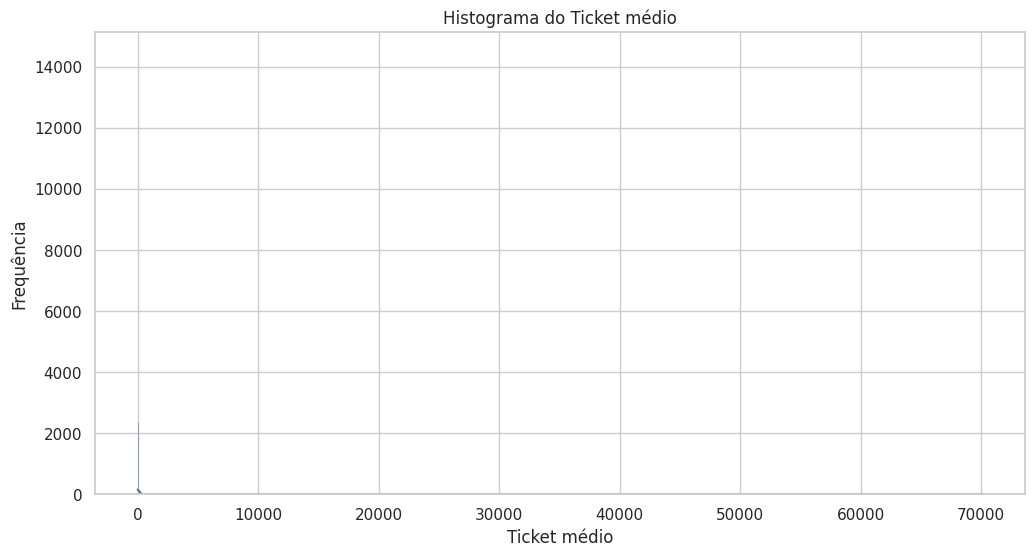

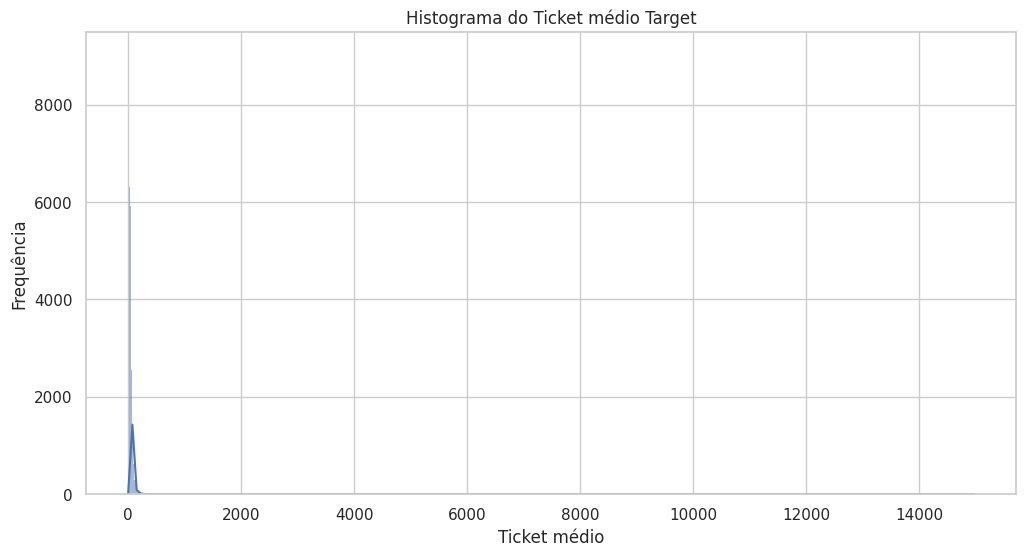

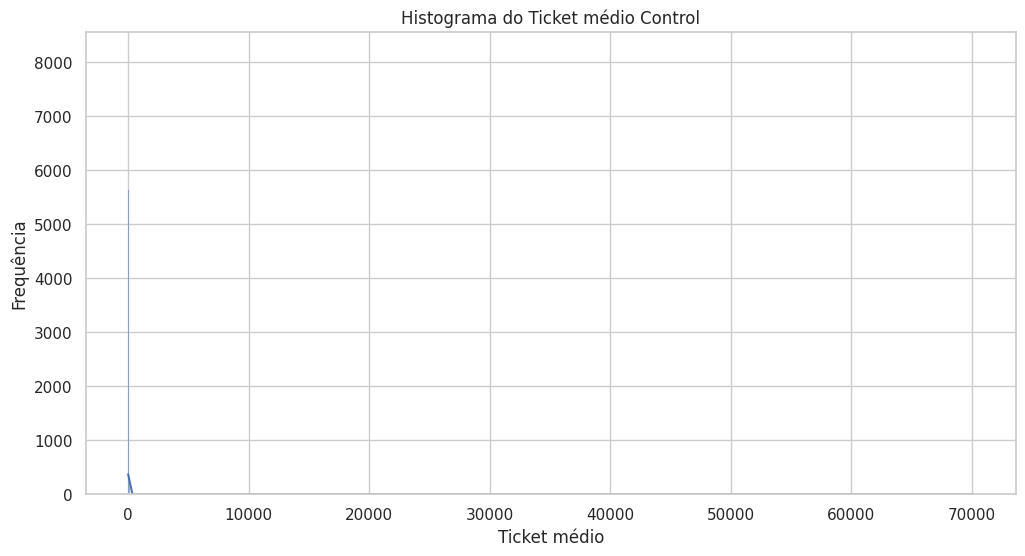

In [67]:
df_ticket_per_user = orders_cleaned_target_agg.toPandas()

plt.figure(figsize=(12, 6))
sns.histplot(df_ticket_per_user['avg(order_total_amount)'], kde=True)
plt.title('Histograma do Ticket médio')
plt.xlabel('Ticket médio')
plt.ylabel('Frequência')

plt.figure(figsize=(12, 6))
sns.histplot(df_ticket_per_user[df_ticket_per_user['is_target']=='target']['avg(order_total_amount)'], kde=True)
plt.title('Histograma do Ticket médio Target')
plt.xlabel('Ticket médio')
plt.ylabel('Frequência')

plt.figure(figsize=(12, 6))
sns.histplot(df_ticket_per_user[df_ticket_per_user['is_target']=='control']['avg(order_total_amount)'], kde=True)
plt.title('Histograma do Ticket médio Control')
plt.xlabel('Ticket médio')
plt.ylabel('Frequência')

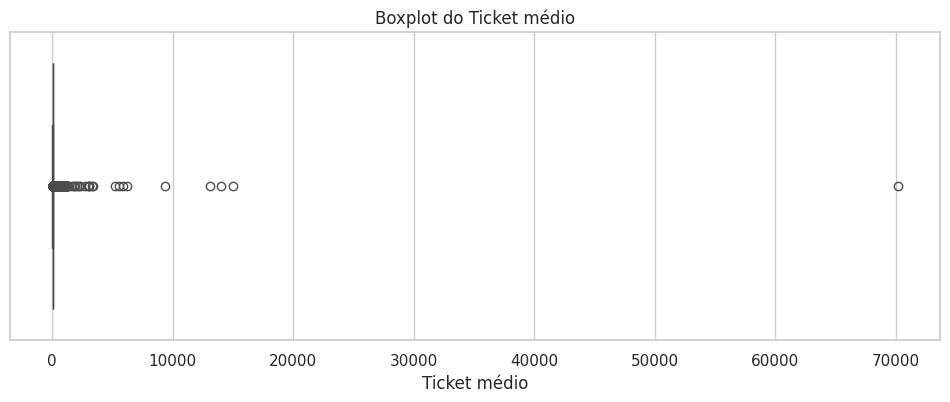

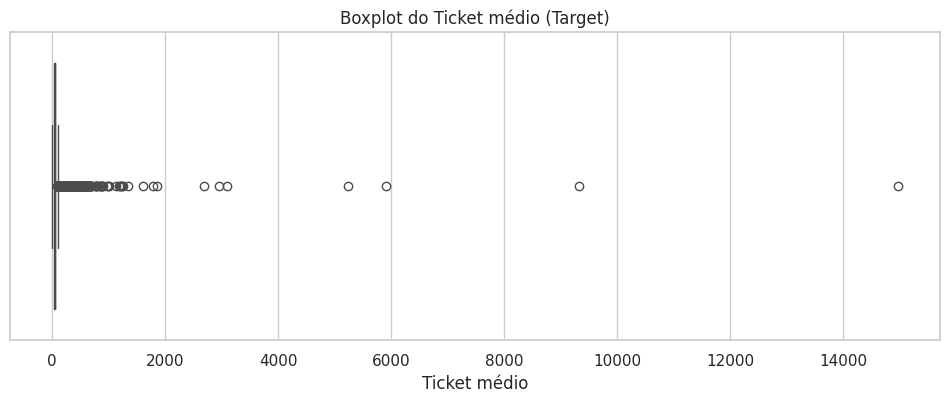

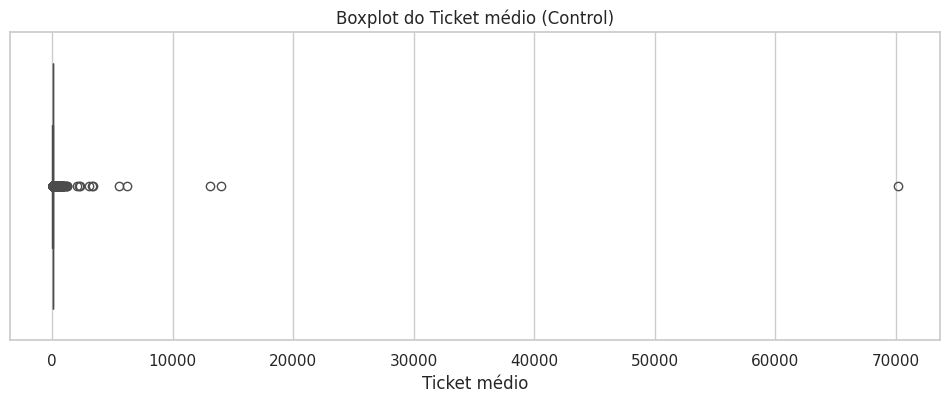

In [68]:
plt.figure(figsize=(12, 4))
sns.boxplot(x=df_ticket_per_user['avg(order_total_amount)'])
plt.title('Boxplot do Ticket médio')
plt.xlabel('Ticket médio')

plt.figure(figsize=(12, 4))
sns.boxplot(x=df_ticket_per_user[df_ticket_per_user['is_target']=='target']['avg(order_total_amount)'])
plt.title('Boxplot do Ticket médio (Target)')
plt.xlabel('Ticket médio')

plt.figure(figsize=(12, 4))
sns.boxplot(x=df_ticket_per_user[df_ticket_per_user['is_target']=='control']['avg(order_total_amount)'])
plt.title('Boxplot do Ticket médio (Control)')
plt.xlabel('Ticket médio')
plt.show()

In [69]:
quantiles = orders_cleaned_target_agg.approxQuantile('avg(order_total_amount)', [0.25, 0.75], 0.01)
q1, q3 = quantiles
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

ticket_per_user_with_outliers = orders_cleaned_target_agg.withColumn(
    'is_outlier',
    (F.col('avg(order_total_amount)') < lower_bound) | (F.col('avg(order_total_amount)') > upper_bound)
)

ticket_per_user_without_outliers = ticket_per_user_with_outliers.filter(~F.col('is_outlier'))

df_ticket_per_user_with_outliers =  ticket_per_user_with_outliers.toPandas()
df_ticket_per_user_without_outliers =  ticket_per_user_without_outliers.toPandas()

list_ticket_per_user_with_outliers_target =  df_ticket_per_user_with_outliers[df_ticket_per_user_with_outliers['is_target']=='target']['avg(order_total_amount)']
list_ticket_per_user_without_outliers_target =  df_ticket_per_user_without_outliers[df_ticket_per_user_without_outliers['is_target']=='target']['avg(order_total_amount)']

list_ticket_per_user_with_outliers_control =  df_ticket_per_user_with_outliers[df_ticket_per_user_with_outliers['is_target']=='control']['avg(order_total_amount)']
list_ticket_per_user_without_outliers_control =  df_ticket_per_user_without_outliers[df_ticket_per_user_without_outliers['is_target']=='control']['avg(order_total_amount)']

u_stat, p_value = mannwhitneyu(list_ticket_per_user_with_outliers_control, list_ticket_per_user_with_outliers_target)
print(f"Com outliers - U-statistic: {u_stat}, p-value: {p_value}")


print(f"-"*60)


u_stat, p_value = mannwhitneyu(list_ticket_per_user_without_outliers_control, list_ticket_per_user_without_outliers_target)
print(f"Sem outliers - U-statistic: {u_stat}, p-value: {p_value}")

Com outliers - U-statistic: 79842179760.0, p-value: 3.2379529379507903e-06
------------------------------------------------------------
Sem outliers - U-statistic: 70804603864.0, p-value: 7.168936136767404e-11


In [70]:
print('Média Test:', np.mean(list_ticket_per_user_with_outliers_target))
print('Média Control:', np.mean(list_ticket_per_user_with_outliers_control))
print('Mediana Test:', np.median(list_ticket_per_user_with_outliers_target))
print('Mediana Control:', np.median(list_ticket_per_user_with_outliers_control))
print('Desvio Padrão Test:', np.std(list_ticket_per_user_with_outliers_target))
print('Desvio Padrão Control:', np.std(list_ticket_per_user_with_outliers_control))

mean_target = list_ticket_per_user_with_outliers_target.mean()
mean_control = list_ticket_per_user_with_outliers_control.mean()

abs_lift = mean_target - mean_control
rel_lift = (mean_target - mean_control) / mean_control
rel_lift_pct = rel_lift * 100

print(f'Lift absoluto: {abs_lift:.2f}')
print(f'Lift relativo: {rel_lift_pct:.2f}%')

Média Test: 47.83586766826733
Média Control: 48.00311775650038
Mediana Test: 41.0
Mediana Control: 40.9
Desvio Padrão Test: 43.0627588440438
Desvio Padrão Control: 126.25780471992302
Lift absoluto: -0.17
Lift relativo: -0.35%


In [71]:
print('Média Test:', np.mean(list_ticket_per_user_without_outliers_target))
print('Média Control:', np.mean(list_ticket_per_user_without_outliers_control))
print('Mediana Test:', np.median(list_ticket_per_user_without_outliers_target))
print('Mediana Control:', np.median(list_ticket_per_user_without_outliers_control))
print('Desvio Padrão Test:', np.std(list_ticket_per_user_without_outliers_target))
print('Desvio Padrão Control:', np.std(list_ticket_per_user_without_outliers_control))

mean_target = list_ticket_per_user_without_outliers_target.mean()
mean_control = list_ticket_per_user_without_outliers_control.mean()

abs_lift = mean_target - mean_control
rel_lift = (mean_target - mean_control) / mean_control
rel_lift_pct = rel_lift * 100

print(f'Lift absoluto: {abs_lift:.2f}')
print(f'Lift relativo: {rel_lift_pct:.2f}%')

Média Test: 42.48629103649784
Média Control: 42.23579950574715
Mediana Test: 39.9
Mediana Control: 39.64
Desvio Padrão Test: 18.192951416220144
Desvio Padrão Control: 18.284981920185977
Lift absoluto: 0.25
Lift relativo: 0.59%


###Segmentações:
- Frequência de compra
- Ticket Médio
- Preço dos restaurantes
- Usuários reativos
- Tempo de cadastro
- Plataforma (IOS e android)

Frequência de compra → count(order_id) por usuário no período do teste

Ticket médio → sum(order_total_amount) / count(order_id) por usuário

Tempo de cadastro → datediff(min(order_created_at), created_at) no join com consumers

Cidade → campo delivery_address_city no dataset de pedidos

Frequência de pedidos: Alta ( > 3 pedidos ), Baixa ( < = 3 ).

Ticket médio: Alto > 100 reais, Baixo <= 100 reais.

Restaurantes: Premium (price_range > 3 ou average_ticket > R$50), Econômico (abaixo disso).

Usuários reativados: Sim (inativos antes do teste, ativos durante), Não.

Região: Por estado (delivery_address_state).

Plataforma: Android, iOS, Outros (baseado em origin_platform).

Melhores Segmentações

- Frequência Alta, Baixo Ticket, Restaurantes Premium, Windows Phone: +13,64% (Pedidos), +11,78% (Receita), +0,97% (Ticket Médio).

- Reativação Inativos: +58,38% (Pedidos), +55,18% (Receita, de `R$114.324,95` para `R$177.405,22`).

Piores Segmentações

- Frequência Alta, Alto Ticket, Restaurantes Econômicos, Windows Phone: -16,66% (Pedidos), -13,39% (Receita), +4,31% (Ticket Médio).


Segmentações Intermediárias
- Baixa Frequência, Baixo Ticket, Restaurantes Econômicos, Windows Phone: +3,29% (Pedidos), +6,31% (Receita), +2,80% (Ticket Médio).
- Baixa Frequência, Alto Ticket, Restaurantes Premium, Android: +2,43% (Pedidos), -2,69% (Receita), -3,73% (Ticket Médio).
- Baixa Frequência, Baixo Ticket, Restaurantes Premium, Windows Phone: +5,71% (Pedidos), +4,41% (Receita), -1,12% (Ticket Médio).


In [74]:
agg_df = orders_cleaned_target.groupBy("customer_id", "is_target","price_range","origin_platform","active").agg(
    F.count("order_id").alias("num_orders"),
    F.avg("order_total_amount").alias("avg_ticket"),
    F.sum("order_total_amount").alias("total_spent"),
    F.min("data_convertida").alias("first_order_date"),
    F.min("created_at_consumer").alias("signup_date")
).withColumn(
    "days_since_signup",
    F.datediff(F.col("first_order_date"), F.col("signup_date")))



agg_df.show(truncate=False)

+----------------------------------------------------------------+---------+-----------+---------------+------+----------+------------------+------------------+----------------+-----------------------+-----------------+
|customer_id                                                     |is_target|price_range|origin_platform|active|num_orders|avg_ticket        |total_spent       |first_order_date|signup_date            |days_since_signup|
+----------------------------------------------------------------+---------+-----------+---------------+------+----------+------------------+------------------+----------------+-----------------------+-----------------+
|004dc916e193d924b1c1ccd3199da900f6568e803f3c5d3175a5f6b5fc670224|control  |3          |IOS            |true  |1         |46.1              |46.1              |2018-12-30      |2018-04-06 05:11:12.946|268              |
|00515897b190757b562c223e99ceb9b978db8bff264204a682acd828b46d2d21|target   |3          |IOS            |true  |1        

In [75]:
agg_df.select('origin_platform').distinct().show()

+---------------+
|origin_platform|
+---------------+
|           null|
|        DESKTOP|
|  WINDOWS_PHONE|
|        ANDROID|
|            IOS|
+---------------+



In [78]:
seg_df = agg_df.withColumn(
    "freq_segment", F.when(F.col("num_orders") > 3, "Alto")
    .otherwise("Baixo")
).withColumn(
    "ticket_segment", F.when(F.col("avg_ticket") > 50, "Alto")
    .otherwise("Baixo")
).withColumn(
    "cadastro_segment", F.when(F.col("days_since_signup") < 30, "Novo")
    .when((F.col("days_since_signup") >= 30) & (F.col("days_since_signup") <= 180), "Regular")
    .otherwise("Antigo")
).withColumn(
    "price_rest_range_segment", F.when(F.col("price_range") > 3, "Premium")
    .otherwise("Economico")
).withColumn(
    "platform_segment",
    F.when(F.col("origin_platform").contains("ANDROID"), "ANDROID")
    .when(F.col("origin_platform").contains("IOS"), "IOS")
    .when(F.col("origin_platform").contains("DESKTOP"),"DESKTOP")
    .when(F.col("origin_platform").contains("WINDOWS_PHONE"),"WINDOWS_PHONE")
    .otherwise("null")
)

# Calcular métricas por segmento
result = seg_df.groupBy("is_target", "freq_segment", "ticket_segment", "cadastro_segment","price_rest_range_segment","platform_segment").agg(
    F.count("customer_id").alias("num_users"),
    F.avg("num_orders").alias("avg_orders"),
    F.avg("avg_ticket").alias("avg_ticket"),
    F.avg("total_spent").alias("avg_spent")
)

result.show(truncate=False)

+---------+------------+--------------+----------------+------------------------+----------------+---------+------------------+------------------+------------------+
|is_target|freq_segment|ticket_segment|cadastro_segment|price_rest_range_segment|platform_segment|num_users|avg_orders        |avg_ticket        |avg_spent         |
+---------+------------+--------------+----------------+------------------------+----------------+---------+------------------+------------------+------------------+
|target   |Baixo       |Alto          |Antigo          |Premium                 |DESKTOP         |13820    |1.3418958031837915|91.73279124457308 |122.03318017366136|
|control  |Baixo       |Alto          |Antigo          |Economico               |WINDOWS_PHONE   |767      |1.3246414602346805|70.01302042590177 |91.66899608865714 |
|control  |Alto        |Alto          |Antigo          |Economico               |WINDOWS_PHONE   |43       |6.255813953488372 |66.17980223458711 |417.4897674418605 |
|tar

In [79]:
pivot_df = result.groupBy("freq_segment", "ticket_segment", "cadastro_segment","price_rest_range_segment","platform_segment") \
    .pivot("is_target", ["control", "target"]) \
    .agg(
        F.first("avg_orders").alias("avg_orders"),
        F.first("avg_ticket").alias("avg_ticket"),
        F.first("avg_spent").alias("avg_spent")
    )

# Calcular o lift
lift_df = pivot_df.withColumn(
    "lift_avg_orders",
    ((F.col("target_avg_orders") - F.col("control_avg_orders")) / F.col("control_avg_orders")) * 100
).withColumn(
    "lift_avg_ticket",
    ((F.col("target_avg_ticket") - F.col("control_avg_ticket")) / F.col("control_avg_ticket")) * 100
).withColumn(
    "lift_avg_spent",
    ((F.col("target_avg_spent") - F.col("control_avg_spent")) / F.col("control_avg_spent")) * 100
)

lift_df.show()

+------------+--------------+----------------+------------------------+----------------+------------------+------------------+------------------+------------------+------------------+------------------+--------------------+-------------------+-------------------+
|freq_segment|ticket_segment|cadastro_segment|price_rest_range_segment|platform_segment|control_avg_orders|control_avg_ticket| control_avg_spent| target_avg_orders| target_avg_ticket|  target_avg_spent|     lift_avg_orders|    lift_avg_ticket|     lift_avg_spent|
+------------+--------------+----------------+------------------------+----------------+------------------+------------------+------------------+------------------+------------------+------------------+--------------------+-------------------+-------------------+
|       Baixo|          Alto|          Antigo|                 Premium|         ANDROID| 1.330442160837183| 82.93764086609468| 111.2689605920618|1.3627577095574175| 79.84156109121669|108.27819594618084|   2.4

In [80]:
active_users = orders_cleaned_target.filter(F.col("active")==False).groupBy("is_target","active")\
  .agg(
    F.avg("order_total_amount").alias("avg_ticket"),
    F.count("order_id").alias("num_orders"),
    F.sum("order_total_amount").alias("total_amount")
)

active_users = active_users.groupBy("active")\
    .pivot("is_target", ["control", "target"]) \
    .agg(
        F.first("avg_ticket").alias("avg_ticket"),
        F.first("num_orders").alias("num_orders"),
        F.first("total_amount").alias("total_amount")
    )

In [81]:
active_users.withColumn(
    "lift_avg_ticket",
    ((F.col("target_avg_ticket") - F.col("control_avg_ticket")) / F.col("control_avg_ticket")) * 100
).withColumn(
    "lift_orders",
    ((F.col("target_num_orders") - F.col("control_num_orders")) / F.col("control_num_orders")) * 100
).withColumn(
    "lift_total_amount",
    ((F.col("target_total_amount") - F.col("control_total_amount")) / F.col("control_total_amount")) * 100
).show()

+------+------------------+------------------+--------------------+------------------+-----------------+-------------------+-------------------+-----------------+-----------------+
|active|control_avg_ticket|control_num_orders|control_total_amount| target_avg_ticket|target_num_orders|target_total_amount|    lift_avg_ticket|      lift_orders|lift_total_amount|
+------+------------------+------------------+--------------------+------------------+-----------------+-------------------+-------------------+-----------------+-----------------+
| false|49.879995636998274|              2292|  114324.95000000004|48.871961432506886|             3630|          177405.22|-2.0209187904252395|58.37696335078534|55.17629353872443|
+------+------------------+------------------+--------------------+------------------+-----------------+-------------------+-------------------+-----------------+-----------------+



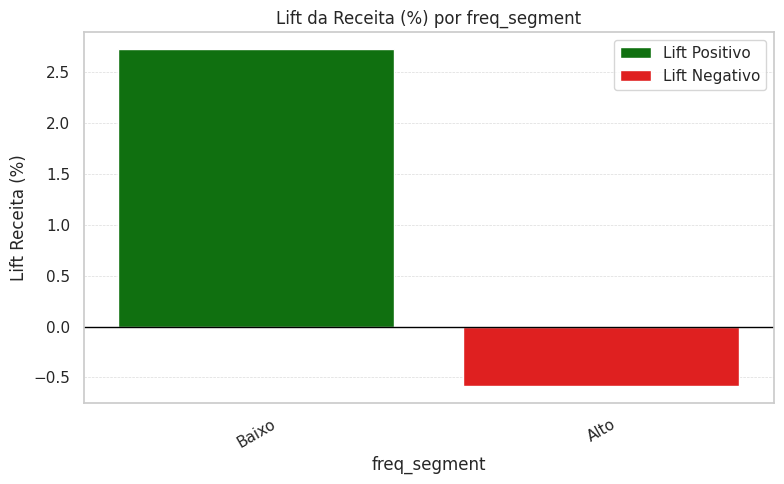

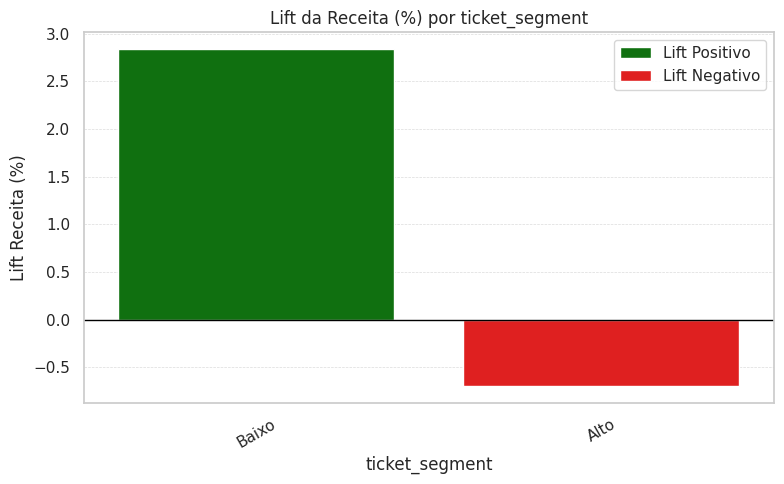

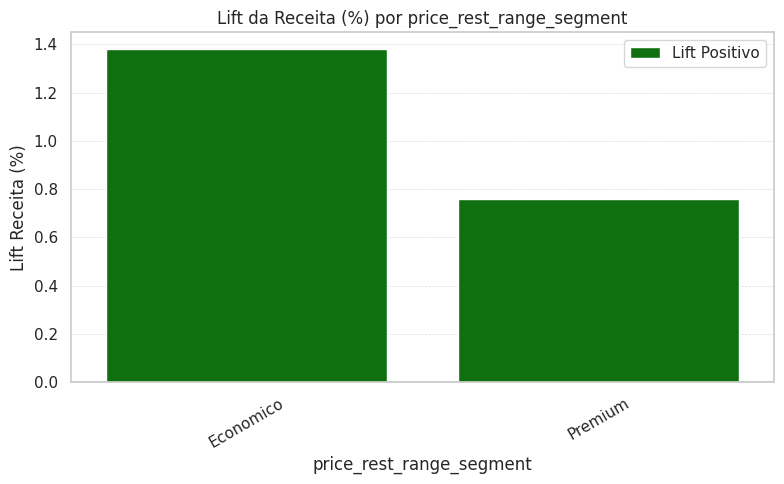

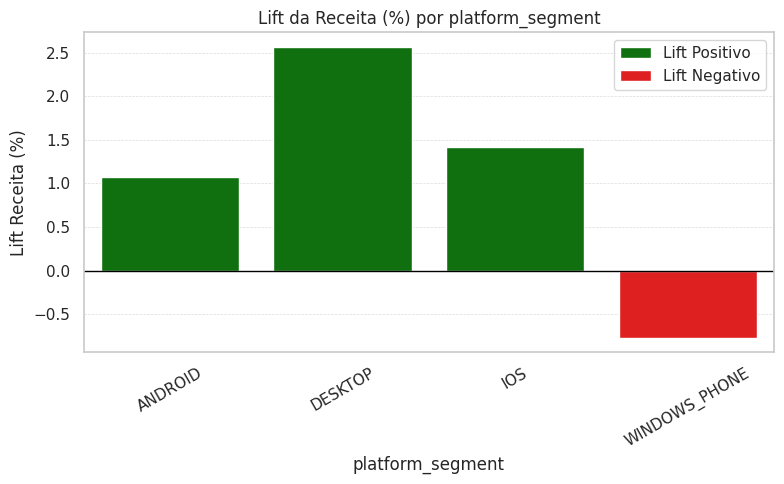

In [82]:
segment_columns = ['freq_segment', 'ticket_segment', 'price_rest_range_segment', 'platform_segment']
df_lift_df = lift_df.toPandas()
for segment in segment_columns:
    plt.figure(figsize=(8, 5))

    df_grouped = df_lift_df.groupby(segment)['lift_avg_spent'].mean().reset_index()

    df_sorted = df_grouped.sort_values(segment)


    df_positive = df_sorted[df_sorted['lift_avg_spent'] >= 0].copy()
    df_negative = df_sorted[df_sorted['lift_avg_spent'] < 0].copy()

    if not df_positive.empty:
        sns.barplot(
            data=df_positive,
            x=segment,
            y='lift_avg_spent',
            color='green',
            label='Lift Positivo'
        )

    if not df_negative.empty:
        sns.barplot(
            data=df_negative,
            x=segment,
            y='lift_avg_spent',
            color='red',
            label='Lift Negativo'
        )

    plt.title(f'Lift da Receita (%) por {segment}')
    plt.xlabel(segment)
    plt.ylabel('Lift Receita (%)')
    plt.xticks(rotation=30)
    plt.grid(axis='y', linestyle='--', linewidth=0.5, alpha=0.7)
    plt.axhline(0, color='black', linewidth=1)
    plt.legend()
    plt.tight_layout()
    plt.show()